In [163]:
# import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#reading the data set
Merged_DF = pd.read_csv(r'C:\Users\nasru\2024-group-05-08-cdsp\data_source\cleaned_data\Merged_DataSet_GDP+Dev_Coutntries.csv')
Merged_DF.head()

ISO3  Countries and areas Region Sub-region Development Regions  \
0  AFG          Afghanistan     SA         SA     Least Developed   
1  DZA              Algeria   MENA       MENA      Less Developed   
2  AGO               Angola    SSA        ESA     Least Developed   
3  ATG  Antigua and Barbuda    LAC        LAC      Less Developed   
4  ARG            Argentina    LAC        LAC      Less Developed   

   OOR_Primary_Total  OOR_Primary_Female  OOR_Primary_Male  \
0               37.0                47.0              28.0   
1                2.0                 2.0               2.0   
2               22.0                22.0              21.0   
3                2.0                 2.0               3.0   
4                0.0                 0.0               0.0   

   OOR_Primary_Residence_Rural  OOR_Primary_Residence_Urban  ...  \
0                         42.0                           19  ...   
1                          2.0                            1  ...   
2                         35.0                           14  ...   
3                          2.0                            2  ...   
4                          2.0                            2  ...   

   ATR_UpperSecondary_Male  ATR_UpperSecondary_Residence_Rural  \
0                19.000000                           37.000000   
1                62.000000                           40.000000   
2                28.000000                           32.000000   
3                49.327273                           45.372727   
4                71.000000                           63.000000   

   ATR_UpperSecondary_Residence_Urban  ATR_UpperSecondary_Wealth_Poorest  \
0                           24.000000                           40.00000   
1                           42.000000                           55.00000   
2                            7.000000                           39.00000   
3                           40.268519                           54.37037   
4                           40.268519                           54.37037   

   ATR_UpperSecondary_Wealth_Second  ATR_UpperSecondary_Wealth_Middle  \
0                          17.00000                         21.000000   
1                          28.00000                         42.000000   
2                           3.00000                          6.000000   
3                          29.87619                         37.778846   
4                          49.00000                         65.000000   

   ATR_UpperSecondary_Wealth_Fourth  ATR_UpperSecondary_Wealth_Richest  \
0                         22.000000                                 33   
1                         49.000000                                 58   
2                         20.000000                                 38   
3                         43.394231                                 51   
4                         73.000000                                 74   

                                      Indicator Name   Year2021  
0  Government expenditure on education, total (% ...   0.000000  
1  Government expenditure on education, total (% ...  16.050697  
2  Government expenditure on education, total (% ...   6.919610  
3  Government expenditure on education, total (% ...  10.409337  
4  Government expenditure on education, total (% ...  12.284900  

[5 rows x 102 columns]

In [10]:
Merged_DF.shape

(123, 102)

# Explanatory Data Analysis

In [12]:
# statical analysis
Merged_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Columns: 102 entries, ISO3 to Year2021
dtypes: float64(67), int64(29), object(6)
memory usage: 98.1+ KB


In [13]:
Merged_DF.describe()

OOR_Primary_Total  OOR_Primary_Female  OOR_Primary_Male  \
count         123.000000          123.000000        123.000000   
mean            9.329268            9.451220          9.475610   
std            13.251636           13.996255         12.581676   
min             0.000000            0.000000          0.000000   
25%             2.000000            2.000000          3.000000   
50%             3.000000            2.000000          3.000000   
75%            12.000000           11.500000         12.000000   
max            72.000000           75.000000         70.000000   

       OOR_Primary_Residence_Rural  OOR_Primary_Residence_Urban  \
count                   123.000000                   123.000000   
mean                     11.142276                     5.463415   
std                      15.723992                     7.442999   
min                       0.000000                     0.000000   
25%                       2.000000                     2.000000   
50%                       3.000000                     3.000000   
75%                      14.000000                     6.000000   
max                      78.000000                    56.000000   

       OOR_Primary_Wealth_Poorest  OOR_Primary_Wealth_Second  \
count                  123.000000                 123.000000   
mean                    15.512195                  11.264228   
std                     19.854539                  16.683078   
min                      0.000000                   0.000000   
25%                      3.500000                   2.000000   
50%                      4.000000                   2.000000   
75%                     21.000000                  15.000000   
max                     86.000000                  84.000000   

       OOR_Primary_Wealth_Middle  OOR_Primary_Wealth_Fourth  \
count                 123.000000                 123.000000   
mean                    8.540650                   6.300813   
std                    13.786813                  10.182704   
min                     0.000000                   0.000000   
25%                     2.000000                   2.000000   
50%                     2.000000                   2.000000   
75%                     9.000000                   5.000000   
max                    77.000000                  65.000000   

       OOR_Primary_Wealth_Richest  ...  ATR_UpperSecondary_Female  \
count                  123.000000  ...                 123.000000   
mean                     3.447154  ...                  44.001183   
std                      5.853685  ...                  21.791059   
min                      0.000000  ...                   3.000000   
25%                      1.000000  ...                  29.000000   
50%                      1.000000  ...                  47.281818   
75%                      3.000000  ...                  54.500000   
max                     44.000000  ...                  96.000000   

       ATR_UpperSecondary_Male  ATR_UpperSecondary_Residence_Rural  \
count               123.000000                          123.000000   
mean                 46.282779                           41.857058   
std                  23.100939                           21.029643   
min                   3.000000                            3.000000   
25%                  29.000000                           28.000000   
50%                  49.327273                           45.372727   
75%                  62.000000                           46.000000   
max                  96.000000                           96.000000   

       ATR_UpperSecondary_Residence_Urban  ATR_UpperSecondary_Wealth_Poorest  \
count                          123.000000                         123.000000   
mean                            36.554502                          51.496537   
std                             22.459901                          19.083151   
min                              0.000000                           8.000000   
25%       

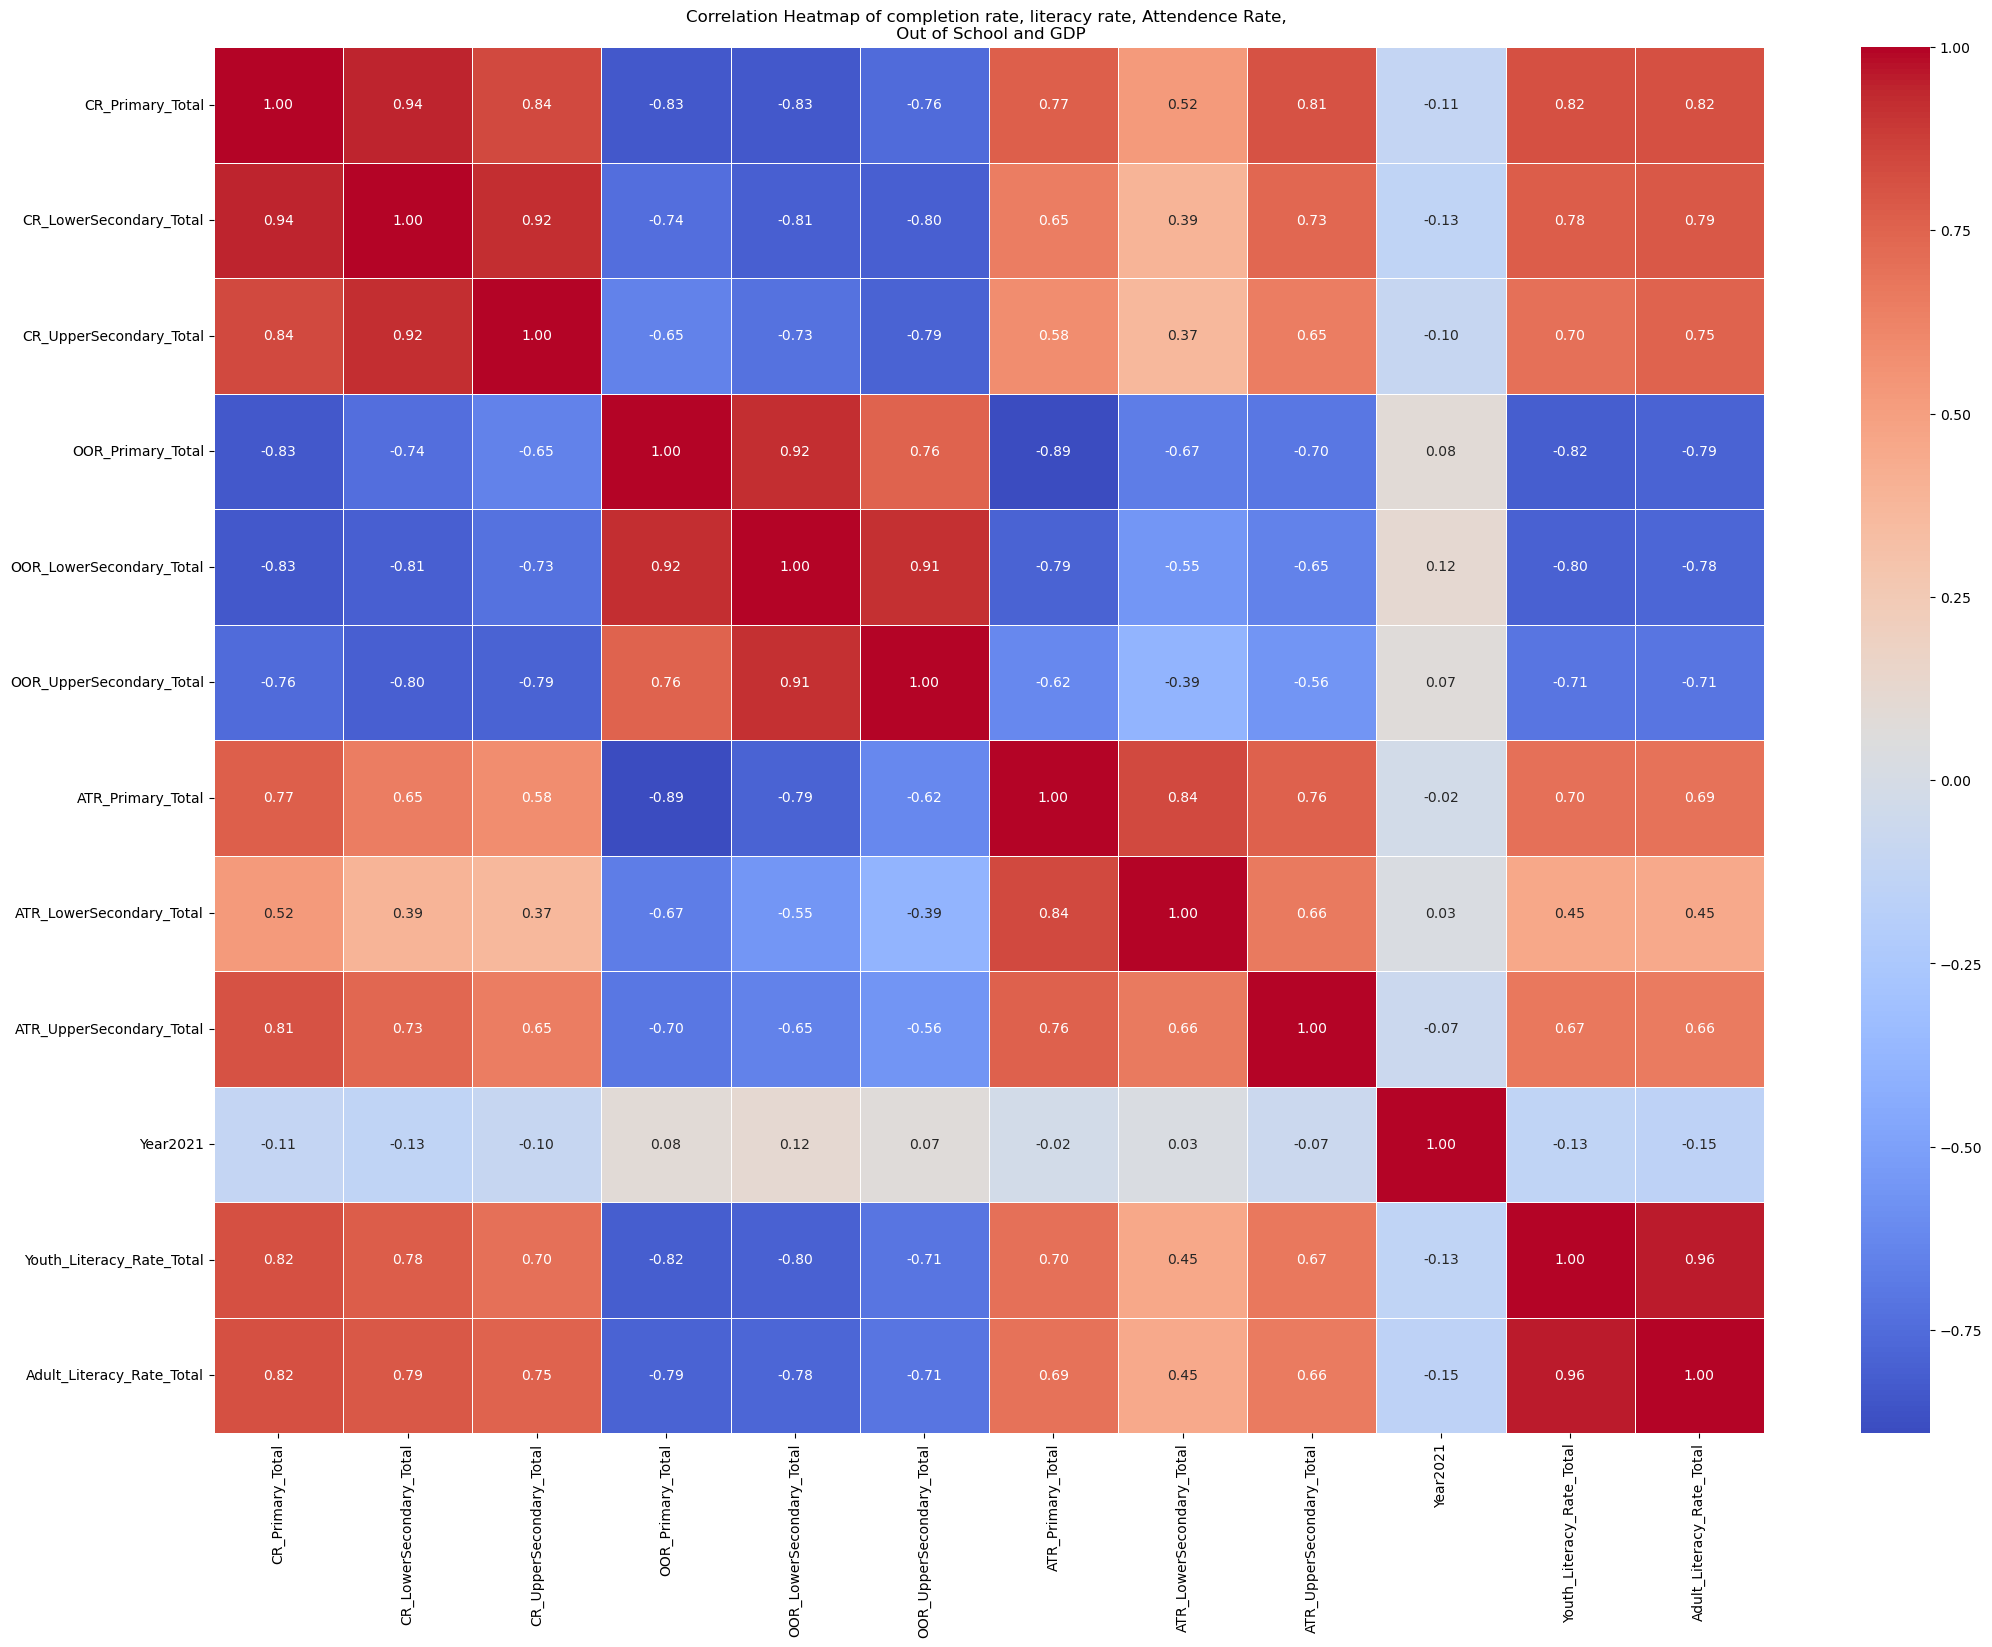

In [22]:
# visualize the correlation between OOR, CR, ATR, LR, and GDP, 
# create a list of relevant data
relevant_columns = ['ISO3', 'Countries and areas', 'Region', 'Sub-region', 'Development Regions', 
                    'CR_Primary_Total',  'CR_LowerSecondary_Total', 'CR_UpperSecondary_Total',
                    'OOR_Primary_Total', 'OOR_LowerSecondary_Total','OOR_UpperSecondary_Total' ,
                    'ATR_Primary_Total', 'ATR_LowerSecondary_Total', 'ATR_UpperSecondary_Total',  "Year2021",
                   'Youth_Literacy_Rate_Total', 'Adult_Literacy_Rate_Total']

# subset the dataframe
df_subset = Merged_DF[relevant_columns]

# calculate correlation matrix
correlation_matrix = df_subset.corr(numeric_only=True)

# create correlation heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of completion rate, literacy rate, Attendence Rate, \n Out of School and GDP')
plt.savefig('Correlation Heatmap of completion rate, literacy rate, Attendence Rate, Out of School and GDP.png')  # Corrected file name
plt.show()


## Findings 

As we can see here, the total completion rate in primary level, lower secondary level, and upper secondary level are positively correlated with the total youth and adult literacy rate. Addressing factors that lead to school dropouts could be a key strategy in literacy improvement efforts.On the other hand, the out of school rate in all there levels are negatively correlated to the total youth and adult literacy rate. Suprisingly, the total youth literacy rate is strongly correlated with the total adult literacy rate. in addition, attendance rates (ATR) at all levels of education show a positive correlation with literacy rates. This indicates that higher school attendance is a strong contributor to increasing literacy rates. Policies and programs that enhance school enrollment and retention could be pivotal in improving literacy. Moreover, the year 2021, representing the 'Government expenditure on education, total (% of GDP)' for that year, shows weak correlations with most educational indicators, suggesting that the immediate impact of government expenditure on education might not be directly observable within the same year. This could be due to the time lag between investment in education and observable improvements in literacy rates. However, the correlation between GDP and educational indicators is varied, with some positive correlations observed with completion and attendance rates. This suggests that economic strength may provide a supportive environment for educational outcomes, which can influence literacy rates.

Overall, the correlation heatmap indicates that out-of-school rates and completion rates are significant factors in literacy rates within developing countries. Government expenditure on education is a factor, but its impact may not be immediate or directly observable within the same fiscal year. To address low literacy rates, policies and interventions that reduce out-of-school rates and improve school completion rates should be prioritized. Moreover, long-term and sustained investment in education, rather than annual changes in government expenditure, may be crucial for lasting improvements in literacy rates. 

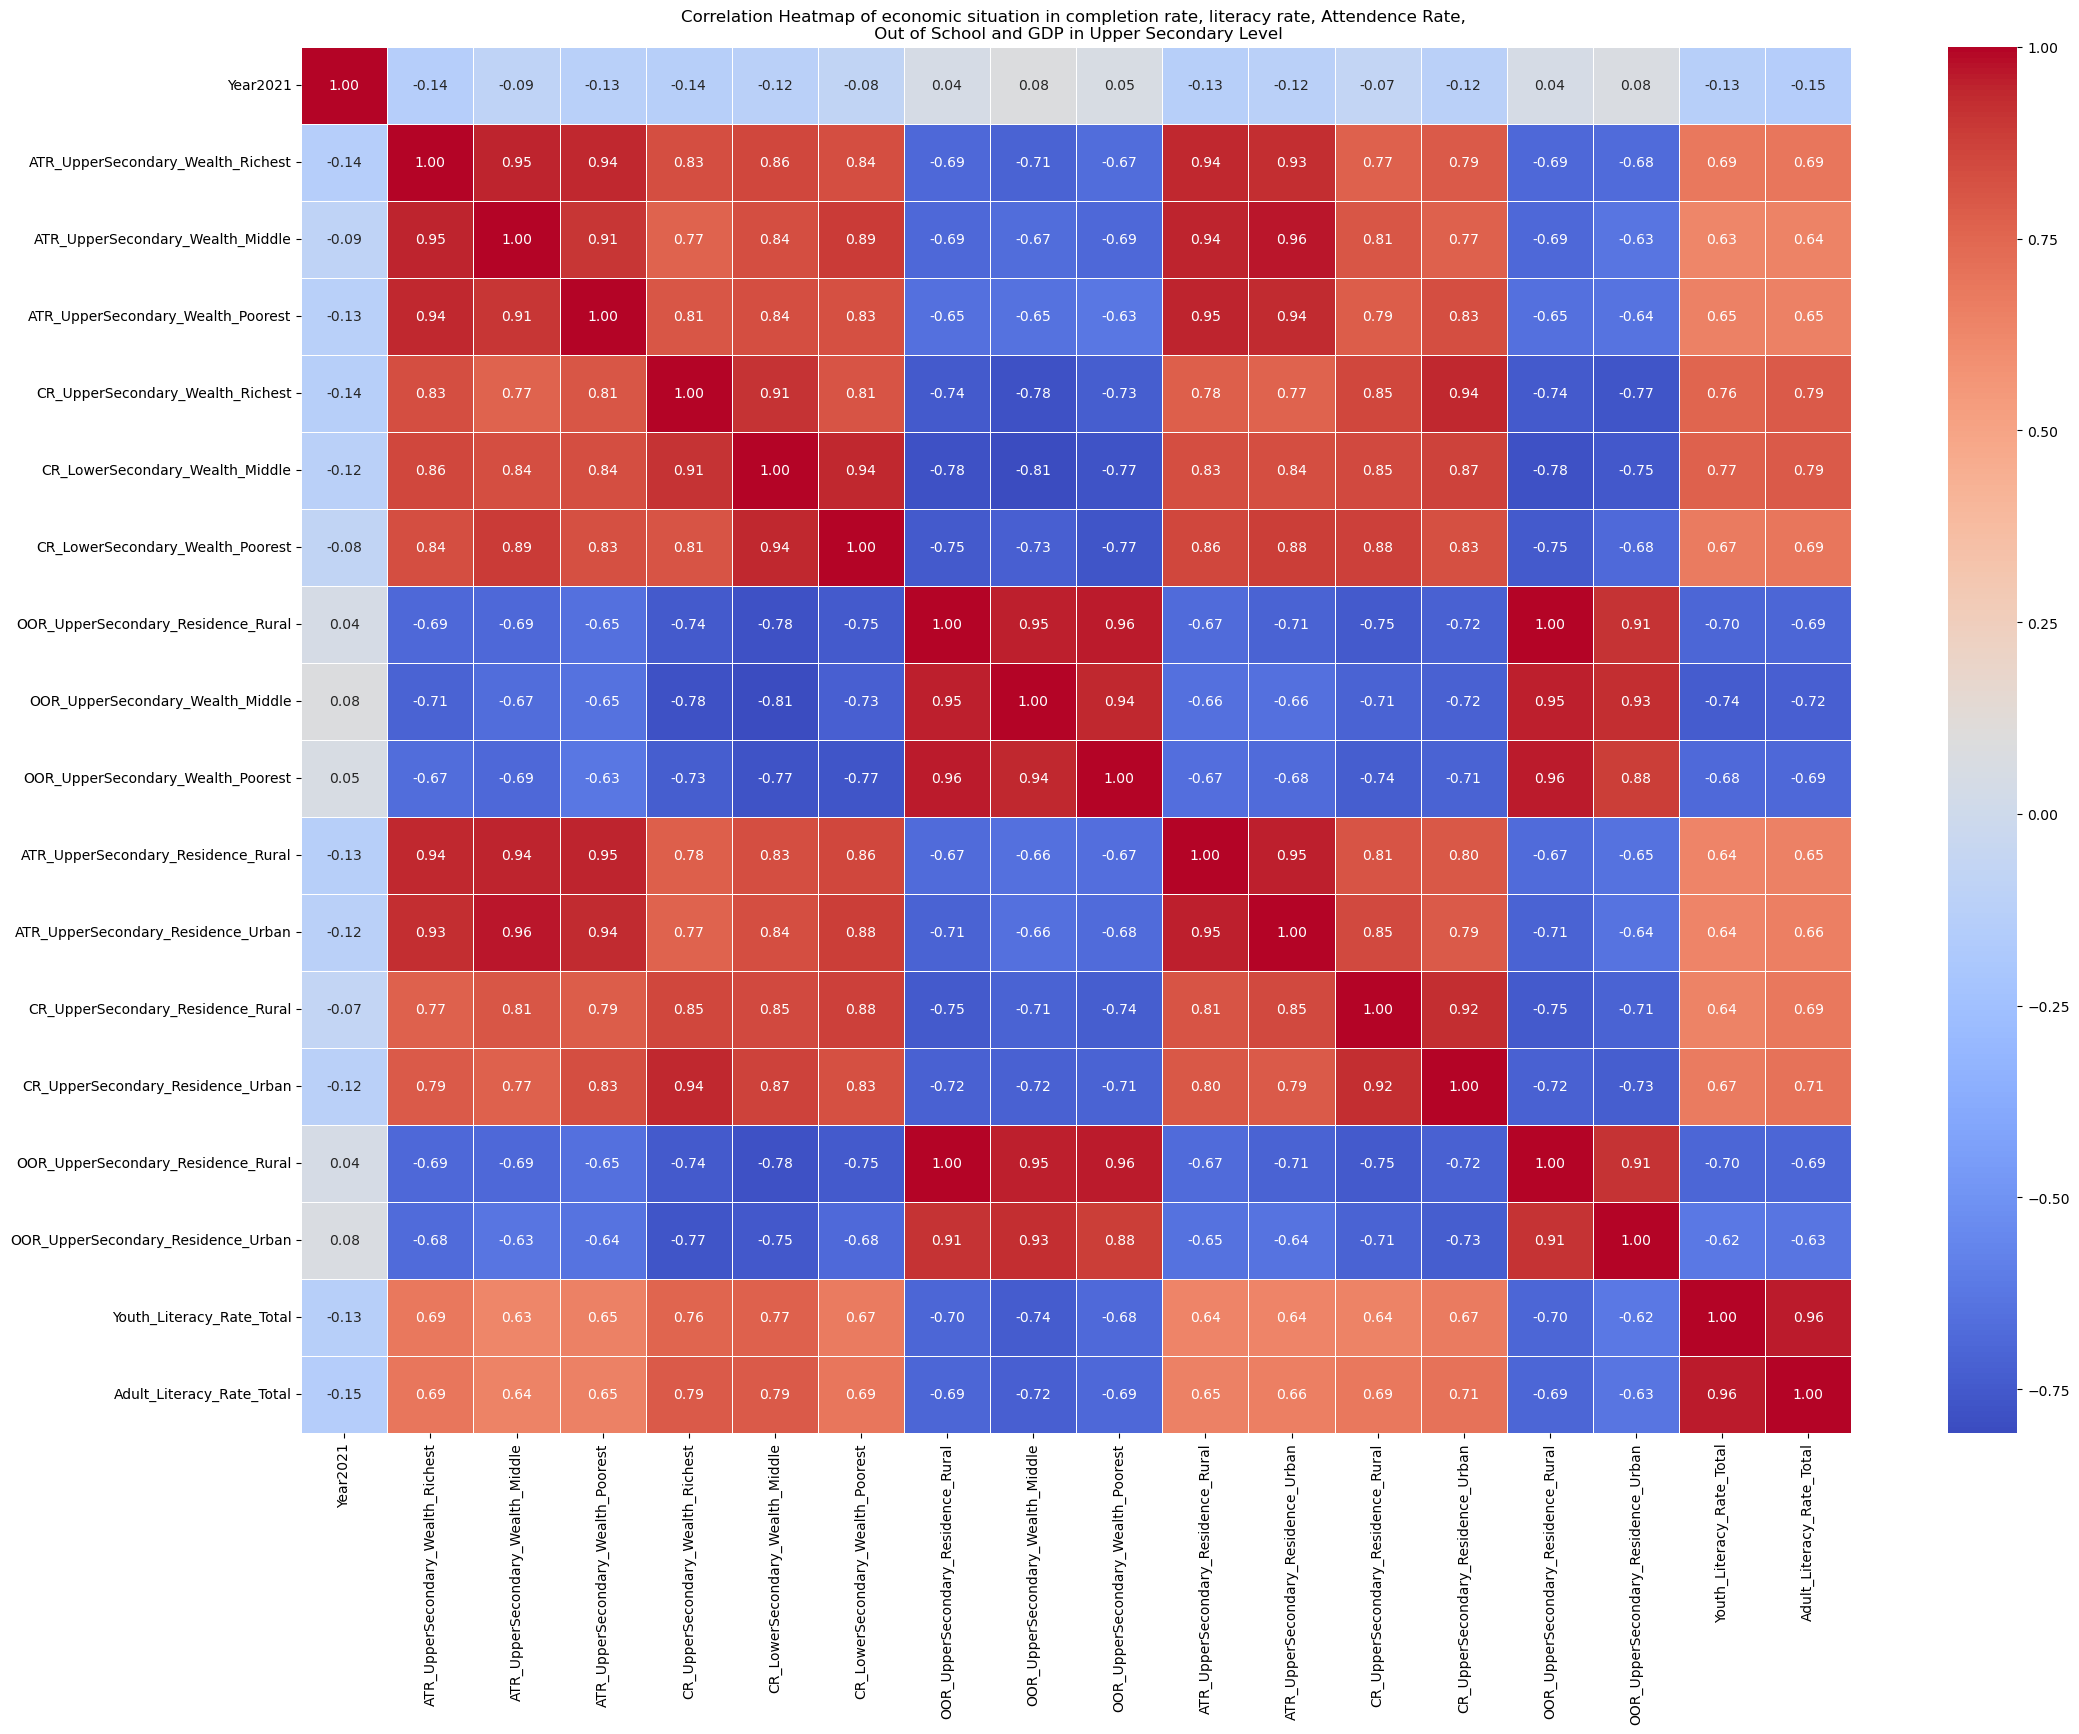

In [25]:
# visualize the correlation between total completion rate and literacy rate from the dataframe 

# create a list of relevant data
relevant_columns = [ "Year2021",
                    'ATR_UpperSecondary_Wealth_Richest', 'ATR_UpperSecondary_Wealth_Middle', 'ATR_UpperSecondary_Wealth_Poorest',
                    'CR_UpperSecondary_Wealth_Richest', 'CR_LowerSecondary_Wealth_Middle', 'CR_LowerSecondary_Wealth_Poorest',
                    'OOR_UpperSecondary_Residence_Rural', 'OOR_UpperSecondary_Wealth_Middle', 'OOR_UpperSecondary_Wealth_Poorest',
                    'ATR_UpperSecondary_Residence_Rural', 'ATR_UpperSecondary_Residence_Urban', 
                    'CR_UpperSecondary_Residence_Rural', 'CR_UpperSecondary_Residence_Urban',
                    'OOR_UpperSecondary_Residence_Rural', 'OOR_UpperSecondary_Residence_Urban',
                    'Youth_Literacy_Rate_Total', 'Adult_Literacy_Rate_Total']

# subset the dataframe
df_subset1 = Merged_DF[relevant_columns]

# calculate correlation matrix
correlation_matrix1 = df_subset.corr(numeric_only=True)

# create correlation heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(correlation_matrix1, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of economic situation in completion rate, literacy rate, Attendence Rate, \n Out of School and GDP in Upper Secondary Level')
plt.savefig('Correlation Heatmap of economic situations.png')  # Corrected file name
plt.show()

# Findings:
- The wealth quintiles show varying degrees of correlation with literacy rates. The richest wealth quintile has a stronger positive correlation with both youth and adult literacy rates compared to the middle and poorest quintiles. This suggests that economic affluence is a significant factor in educational outcomes, with wealthier individuals likely having better access to educational resources, contributing to higher literacy rates. On the other hand, Attendance rates in urban areas for upper secondary education have a moderately strong positive correlation with literacy rates, more so than rural attendance rates. This implies that urban areas, potentially with better educational infrastructure and resources, may provide a more conducive environment for literacy development. Moreover, Out-of-school rates, particularly in rural areas, have a strong negative correlation with literacy rates. This indicates that students in rural areas are at a higher risk of being out of school, which negatively impacts their literacy development. Furthermore, Completion rates in upper secondary education are positively correlated with literacy rates, especially in urban areas. This highlights the importance of not just attending school but also completing the educational cycle to achieve literacy. 

- The data shows a clear divide between rural and urban settings, with urban settings consistently showing better educational and literacy outcomes. This rural-urban divide is a critical aspect that needs to be addressed in efforts to improve literacy rates. The analysis suggests that improving economic conditions, particularly in poorer and rural areas, and ensuring that students not only attend but also complete their education, are essential for improving literacy rates. Strategies that provide targeted support for education in rural areas, improve the economic conditions of the poorest quintiles, and encourage completion of upper secondary education may be effective in enhancing literacy rates among youth and adults.
- In conclusion, the heatmap indicates that both economic status and location are significant factors influencing literacy rates in developing countries. Addressing these disparities is crucial for policymakers and educational organizations working to improve literacy rates.

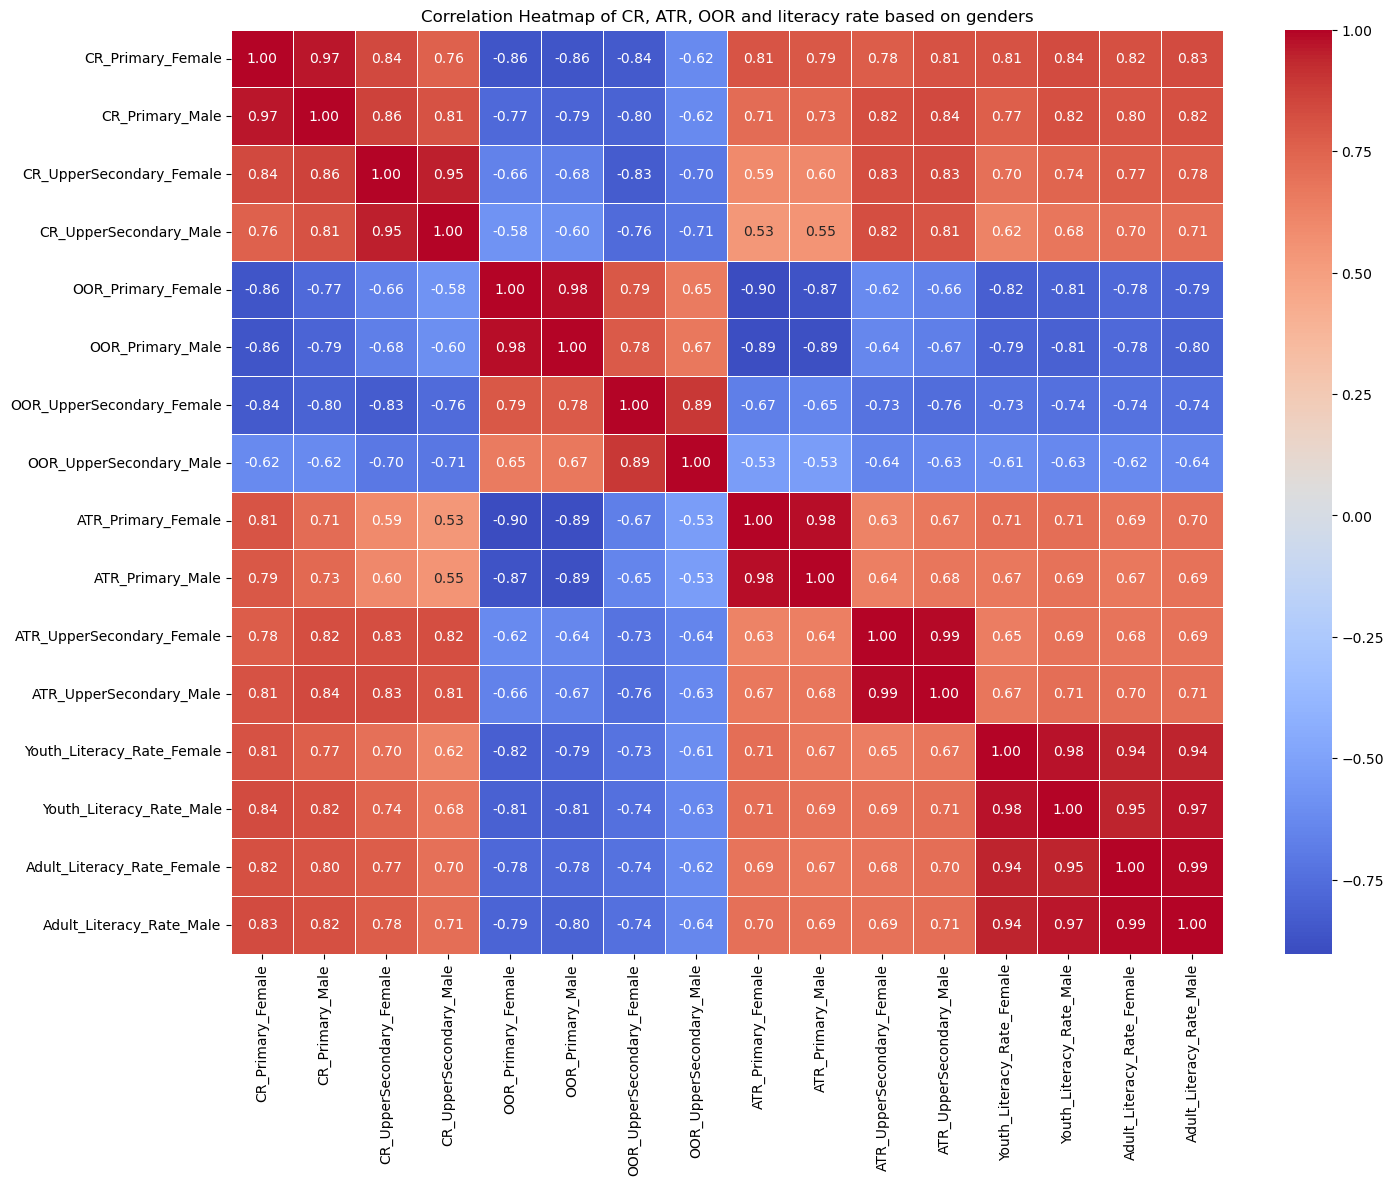

In [28]:
 # visualize the correlation between CR, ATR, OORT, and literacy rate based on genders from the dataframe

# create a list of relevant data
relevant_columns = ['CR_Primary_Female', 'CR_Primary_Male','CR_UpperSecondary_Female', 'CR_UpperSecondary_Male', 
                    'OOR_Primary_Female', 'OOR_Primary_Male', 'OOR_UpperSecondary_Female', 'OOR_UpperSecondary_Male',
                    'ATR_Primary_Female','ATR_Primary_Male', 'ATR_UpperSecondary_Female', 'ATR_UpperSecondary_Male',
                    'Youth_Literacy_Rate_Female','Youth_Literacy_Rate_Male','Adult_Literacy_Rate_Female','Adult_Literacy_Rate_Male']

# subset the dataframe
df_genders = Merged_DF[relevant_columns]

# calculate correlation matrix
correlation_matrix3 = df_genders.corr(numeric_only=True)

# create correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix3, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of CR, ATR, OOR and literacy rate based on genders')
plt.savefig('Correlation Heatmap of CR, ATR, OOR and literacy rate based on genders.png')  # Corrected file name

plt.show()

# Findings:
Both completion rates and attendance rates have high positive correlations with literacy rates for both genders, indicating that as these educational achievements increase, so do literacy rates among both males and females. However, the correlation is slightly stronger for males in both youth and adult literacy rates, suggesting that males may benefit more from increases in these educational indicators than females.


There is a strong negative correlation between out-of-school rates and literacy rates for both genders, with a slightly stronger correlation for females. This implies that females are more adversely affected by being out of school compared to males, which may contribute to lower literacy rates among females in developing countries.

The correlation between educational indicators and literacy rates is generally stronger at the upper secondary level compared to the primary level for both genders. This suggests that higher levels of education are more influential in determining literacy outcomes


Completion Rates Across Genders:

The completion rates for females at the primary and upper secondary levels show a very strong positive correlation with their literacy rates. This is slightly higher than the correlation seen for males, indicating that ensuring females complete their education could be even more impactful for their literacy rates.

Female out-of-school rates at the primary and upper secondary levels are strongly negatively correlated with literacy rates, more so than for males. This indicates that interventions to reduce female out-of-school rates could be particularly effective in increasing literacy rates.


The attendance rates for females at the primary level show a slightly stronger correlation with literacy rates than for males, suggesting that consistent school attendance is particularly crucial for improving literacy rates among females.

The data indicates that to address low literacy rates in developing countries, particularly among females, it is crucial to focus on increasing completion rates and reducing out-of-school rates. Educational policies and programs that support females to complete their education and attend school regularly could significantly improve literacy outcomes.

# Analysis of Literacy Rate based on the country's economies

Now, we will include the countries' economies to analyze the literacy rate of the devloping countries. Economy is very important for a country. A country gets most of its funds from economy for the development in all sectors. The primary pillar of a country's economy can be different (e.g. agriculture, natural resources, technology, etc.). In this dataset, UNICEF defined four different levels of economy, 'Least Developed', 'Less Developed', 'More Developed', 'Not Classified'. But, we are only focusing on 'Least Developed', 'Less Developed' countries. 

In [29]:
# identify different economies in the dataset 
print(Merged_DF['Development Regions'].unique())

['Least Developed' 'Less Developed']


In [31]:
least_Dev= Merged_DF[Merged_DF['Development Regions']=='Least Developed']
less_Dev= Merged_DF[Merged_DF['Development Regions']=='Less Developed']

In [32]:
print(least_Dev.shape)
print(less_Dev.shape)

(42, 102)
(81, 102)


In [35]:
least_Dev[[ 'Youth_Literacy_Rate_Total','Adult_Literacy_Rate_Total']].describe()

Youth_Literacy_Rate_Total  Adult_Literacy_Rate_Total
count                  42.000000                  42.000000
mean                   77.047619                  62.642857
std                    13.420411                  13.746967
min                    38.000000                  35.000000
25%                    79.500000                  64.500000
50%                    79.500000                  64.500000
75%                    79.500000                  64.500000
max                    98.000000                  93.000000

In [46]:
least_Less77=least_Dev[least_Dev['Youth_Literacy_Rate_Total']<77]
least_Less77

ISO3       Countries and areas Region Sub-region Development Regions  \
0    AFG               Afghanistan     SA         SA     Least Developed   
11   BEN                     Benin    SSA        WCA     Least Developed   
16   BFA              Burkina Faso    SSA        WCA     Least Developed   
21   CAF  Central African Republic    SSA        WCA     Least Developed   
66   MLI                      Mali    SSA        WCA     Least Developed   
79   NER                     Niger    SSA        WCA     Least Developed   
96   SLE              Sierra Leone    SSA        WCA     Least Developed   
101  SSD               South Sudan    SSA        ESA     Least Developed   
103  SDN                     Sudan    SSA        ESA     Least Developed   

     OOR_Primary_Total  OOR_Primary_Female  OOR_Primary_Male  \
0                 37.0                47.0              28.0   
11                32.0                35.0              28.0   
16                48.0                50.0              46.0   
21                26.0                30.0              23.0   
66                47.0                50.0              45.0   
79                49.0                54.0              45.0   
96                17.0                15.0              20.0   
101               72.0                75.0              70.0   
103               21.0                21.0              20.0   

     OOR_Primary_Residence_Rural  OOR_Primary_Residence_Urban  ...  \
0                           42.0                           19  ...   
11                          38.0                           21  ...   
16                          55.0                           17  ...   
21                          34.0                           12  ...   
66                          55.0                           18  ...   
79                          55.0                           17  ...   
96                          24.0                            8  ...   
101                         78.0                           56  ...   
103                         27.0                            6  ...   

     ATR_UpperSecondary_Male  ATR_UpperSecondary_Residence_Rural  \
0                       19.0                                37.0   
11                       9.0                                15.0   
16                       3.0                                 6.0   
21                       4.0                                 7.0   
66                      14.0                                20.0   
79                       3.0                                 6.0   
96                      28.0                                30.0   
101                      3.0                                 6.0   
103                     30.0                                28.0   

     ATR_UpperSecondary_Residence_Urban  ATR_UpperSecondary_Wealth_Poorest  \
0                                  24.0                               40.0   
11                                  7.0                               19.0   
16                                  1.0                               13.0   
21                                  0.0                               12.0   
66                                 11.0                               36.0   
79                                  1.0                               14.0   
96                                  9.0                               45.0   
101                                 3.0                                8.0   
103                                23.0                               43.0   

     ATR_UpperSecondary_Wealth_Second  ATR_UpperSecondary_Wealth_Middle  \
0                                17.0                              21.0   
11                                2.0                               5.0   
16                                0.0                               0.0   
21                                0.0                               0.0   
66                                3.0                           

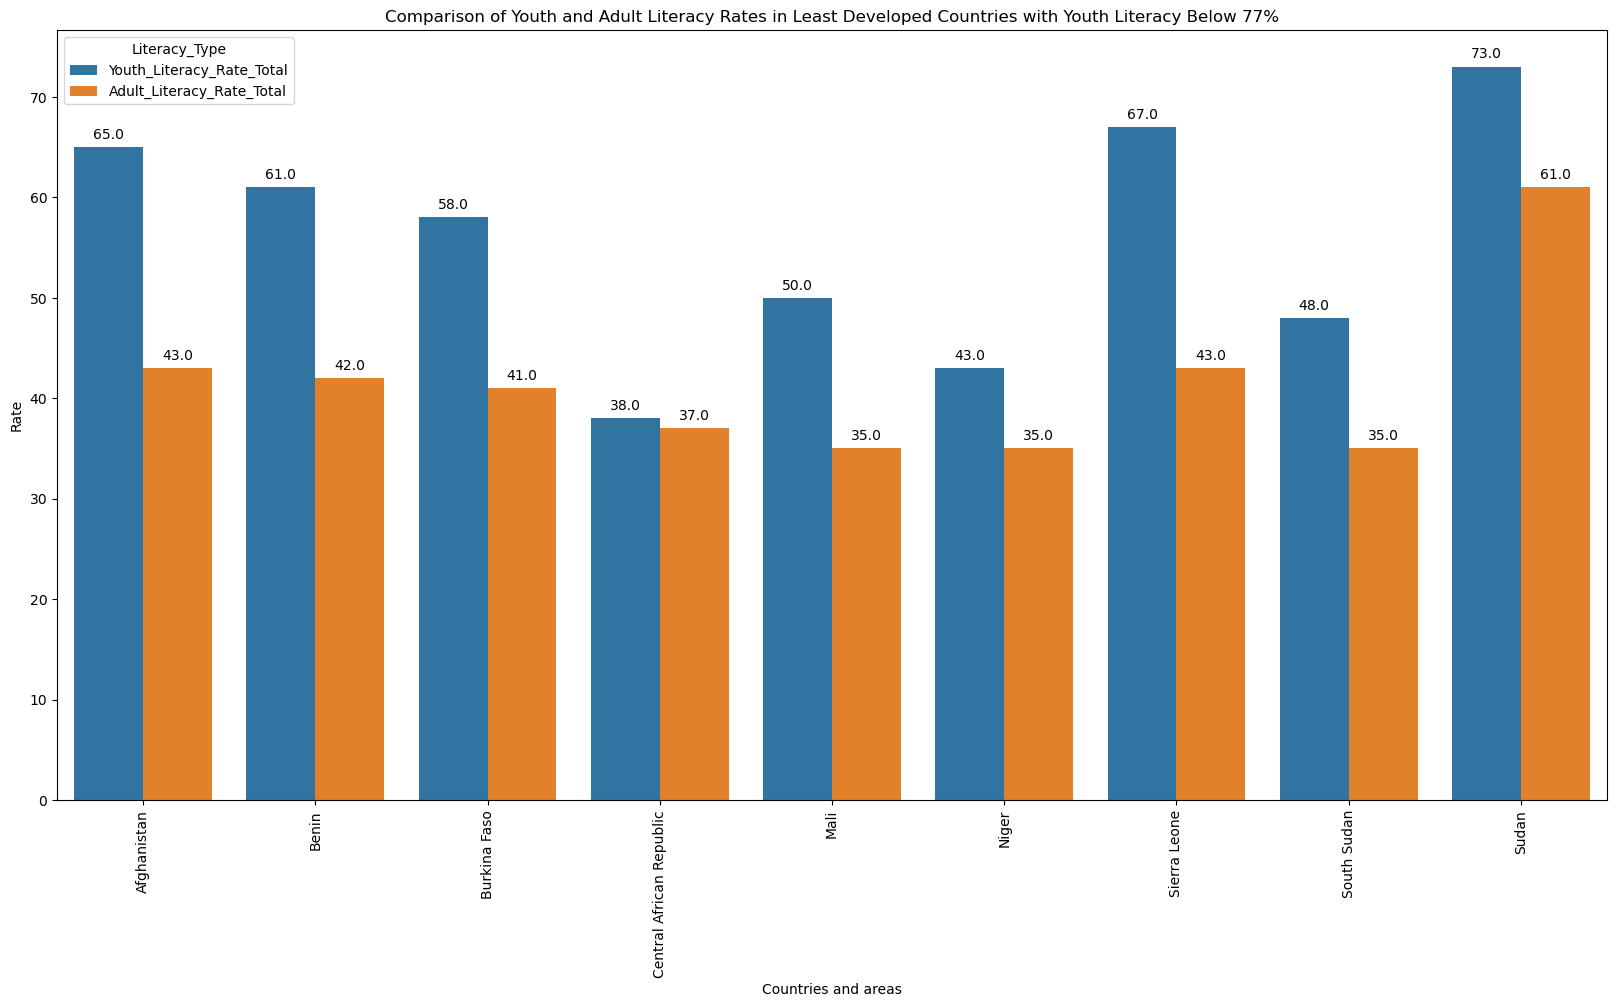

In [64]:
# Melting the dataframe to long format for seaborn
melted_df = least_Less77.melt(id_vars=['ISO3', 'Countries and areas'],
                              value_vars=['Youth_Literacy_Rate_Total', 'Adult_Literacy_Rate_Total'],
                              var_name='Literacy_Type', value_name='Rate')

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
barplot = sns.barplot(data=melted_df, x='Countries and areas', y='Rate', hue='Literacy_Type')

# Iterate over the bars and use the `text` function to display the percentages
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.title('Comparison of Youth and Adult Literacy Rates in Least Developed Countries with Youth Literacy Below 77%')
plt.savefig('Youth vs Adult Literacy Rates less than 77 Least Developed Countries .png')

plt.show()


# Findings:
Youth vs. Adult Literacy Rates: There is a noticeable trend where adult literacy rates are generally lower than youth literacy rates across these countries. This could indicate that there have been improvements in access to education over time, or it may reflect the impact of educational policies targeting younger populations.

Consistency Across Countries: Despite variances in the actual percentages, the pattern of youth rates exceeding adult rates is consistent across the countries shown. This consistency might suggest that similar factors are influencing literacy rates across these geographical regions.

Development Implications: The graph underscores the challenge of raising adult literacy rates, which is crucial for socio-economic development. Adults with low literacy rates may have fewer opportunities for employment, which can perpetuate cycles of poverty and limit economic growth.

Policy Considerations: The data suggests that while efforts to improve youth literacy may be showing results, there is a significant need for adult education programs. Policies that focus on adult education could help to improve these rates, which is essential for the empowerment of the adult population and for achieving equitable economic development.

Research and Targeted Interventions: For researchers and policymakers, these insights could guide further investigation into the root causes of low literacy rates and the development of targeted interventions. Understanding the specific challenges faced by adults in acquiring literacy skills would be critical to designing effective adult education programs.

The analysis aligns with the research question on the major contributors to low literacy rates in developing countries by highlighting the gap between youth and adult literacy rates, suggesting a focus on adult education as a potential key area for intervention and improvement.

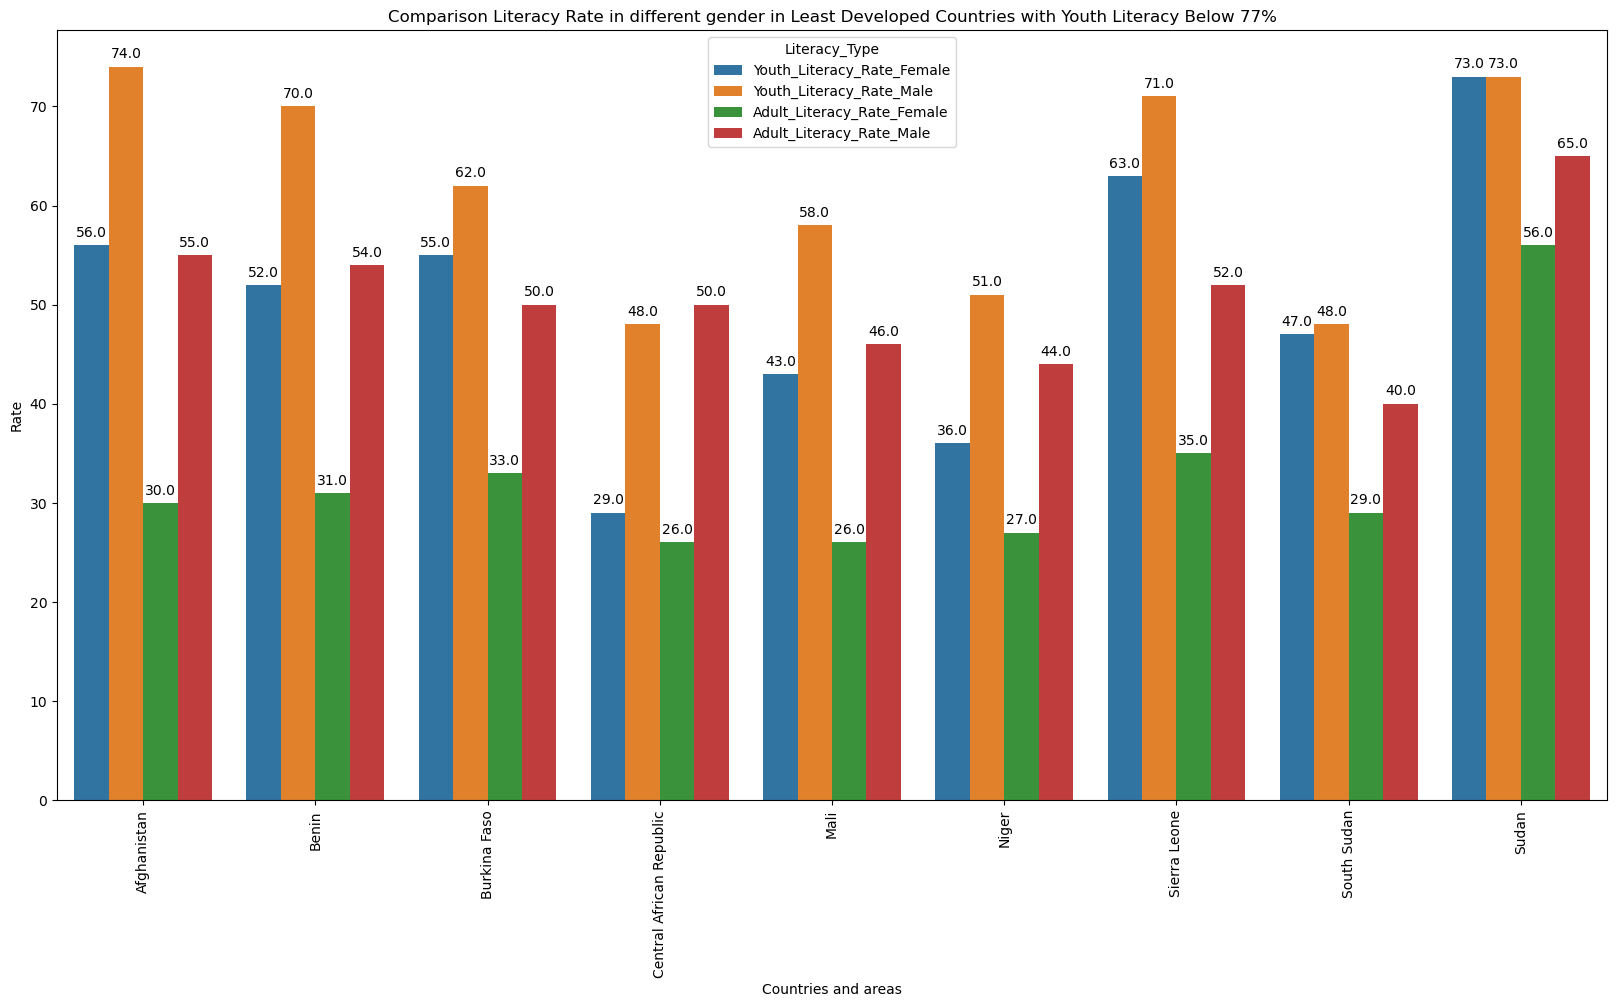

In [70]:
 
   # Melting the dataframe to long format for seaborn
melted_df = least_Less77.melt(id_vars=['ISO3', 'Countries and areas'],
                              value_vars=['Youth_Literacy_Rate_Female','Youth_Literacy_Rate_Male','Adult_Literacy_Rate_Female','Adult_Literacy_Rate_Male'],
                              var_name='Literacy_Type', value_name='Rate')

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
barplot = sns.barplot(data=melted_df, x='Countries and areas', y='Rate', hue='Literacy_Type')

# Iterate over the bars and use the `text` function to display the percentages
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.title('Comparison Literacy Rate in different gender in Least Developed Countries with Youth Literacy Below 77%')
plt.savefig('Comparison Literacy Rate in different gender in Least Developed Countries with Youth Literacy Below 77%.png')

plt.show()
 

Gender Disparity: There is a noticeable gender disparity in literacy rates, particularly in youth literacy, where females generally have lower literacy rates than males. This trend is also present, albeit to a lesser extent, in adult literacy rates. The disparity suggests that females in these countries may face more barriers to education, which could be a significant contributor to the low literacy rates observed.

The graph indicates that adult literacy rates are generally lower than youth literacy rates for both genders. This could be attributed to the implementation of more recent educational reforms or development programs that have not yet impacted the adult population.

Some countries exhibit extreme disparities in gender-specific literacy rates, which could point to specific cultural, social, or economic factors affecting education and literacy in these regions. For example, a country with a stark difference in literacy rates between males and females might have gender-biased educational practices or less access to education for females.

To address the research question, the graph highlights the need for gender-sensitive educational policies and programs that can elevate literacy rates, particularly among women and adult populations. Investments in adult education and female literacy programs may be especially impactful.

While the graph does not directly show economic data, the correlation between low literacy rates and economic hardship can be inferred. Poorer countries or regions within countries may struggle more with literacy rates, suggesting a link between economic conditions and education.

Potential for Growth: The higher literacy rates among the youth indicate potential for future improvement as these more-educated individuals grow older. However, this potential can only be fully realized if supported by continued educational opportunities and economic development.

Conclusion:
The bar graph's data underscores the critical need to focus on both gender inequality and adult education to improve literacy rates in least developing countries. It aligns with the research question by revealing that gender disparities and inadequate adult literacy programs may be among the major contributors to low literacy rates. To develop effective solutions, a deeper investigation into the causes of these disparities and targeted interventions to support female education and adult literacy programs would be essential.

In [54]:
less_Dev[[ 'Youth_Literacy_Rate_Total','Adult_Literacy_Rate_Total']].describe() 


Youth_Literacy_Rate_Total  Adult_Literacy_Rate_Total
count                  81.000000                  81.000000
mean                   97.987654                  93.320988
std                     3.617644                   6.264637
min                    75.000000                  62.000000
25%                    99.000000                  95.000000
50%                    99.000000                  95.000000
75%                    99.000000                  95.000000
max                   100.000000                 100.000000

In [58]:
less_Dev.shape

(81, 102)

In [67]:
less_Less90=less_Dev[less_Dev['Youth_Literacy_Rate_Total']<90]
less_Less90

ISO3 Countries and areas Region Sub-region Development Regions  \
20  CMR            Cameroon    SSA        WCA      Less Developed   
55  KEN               Kenya    SSA        ESA      Less Developed   
80  NGA             Nigeria    SSA        WCA      Less Developed   

    OOR_Primary_Total  OOR_Primary_Female  OOR_Primary_Male  \
20               15.0                17.0              14.0   
55                5.0                 5.0               5.0   
80               28.0                29.0              27.0   

    OOR_Primary_Residence_Rural  OOR_Primary_Residence_Urban  ...  \
20                         24.0                            6  ...   
55                          5.0                            3  ...   
80                         39.0                           11  ...   

    ATR_UpperSecondary_Male  ATR_UpperSecondary_Residence_Rural  \
20                     27.0                                28.0   
55                     37.0                                34.0   
80                     35.0                                34.0   

    ATR_UpperSecondary_Residence_Urban  ATR_UpperSecondary_Wealth_Poorest  \
20                                11.0                               41.0   
55                                32.0                               46.0   
80                                25.0                               48.0   

    ATR_UpperSecondary_Wealth_Second  ATR_UpperSecondary_Wealth_Middle  \
20                               3.0                               6.0   
55                              15.0                              28.0   
80                               6.0                              22.0   

    ATR_UpperSecondary_Wealth_Fourth  ATR_UpperSecondary_Wealth_Richest  \
20                              20.0                                 34   
55                              36.0                                 47   
80                              38.0                                 51   

                                       Indicator Name   Year2021  
20  Government expenditure on education, total (% ...  15.047904  
55  Government expenditure on education, total (% ...   0.000000  
80  Government expenditure on education, total (% ...   0.000000  

[3 rows x 102 columns]

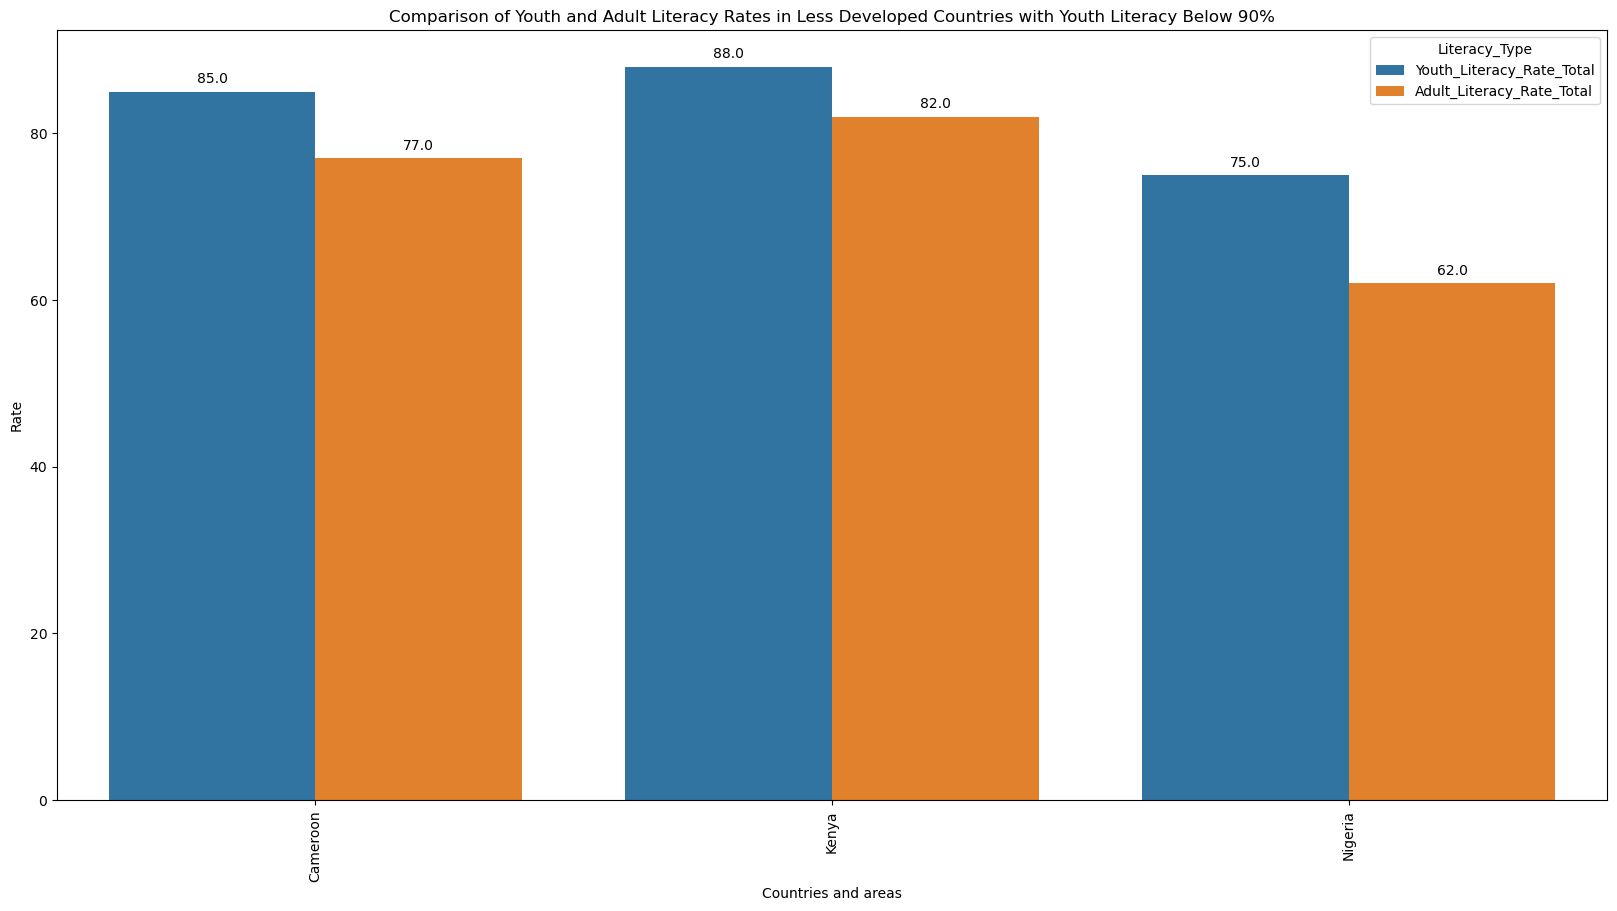

In [72]:
# Melting the dataframe to long format for seaborn
melted_df = less_Less90.melt(id_vars=['ISO3', 'Countries and areas'],
                              value_vars=['Youth_Literacy_Rate_Total', 'Adult_Literacy_Rate_Total'],
                              var_name='Literacy_Type', value_name='Rate')

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
barplot = sns.barplot(data=melted_df, x='Countries and areas', y='Rate', hue='Literacy_Type')

# Iterate over the bars and use the `text` function to display the percentages
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.title('Comparison of Youth and Adult Literacy Rates in Less Developed Countries with Youth Literacy Below 90%')
plt.savefig('Youth vs Adult Literacy Rates less than 90 Less Developed Countries .png')

plt.show()

The graph shows that youth literacy rates are generally higher than adult literacy rates in the countries displayed. This could indicate that educational initiatives implemented in recent years are slowly improving literacy among the younger population, which may not yet have had an impact on adult literacy rates.

There is variability in literacy rates among the countries shown. For example, Nigeria has a significant gap between youth and adult literacy rates, whereas the gap is narrower in Kenya. Such differences may result from varying educational policies, economic conditions, and investments in adult education.

The data supports the need for targeted interventions in adult education, particularly in countries with significant disparities between youth and adult literacy rates. Additionally, the data could guide policymakers to invest in sustained and inclusive educational reforms that address both immediate and long-term literacy challenges.

While the graph does not directly include economic indicators, the selection of countries with lower literacy rates likely correlates with economic challenges. Hence, literacy rate improvements could be both a driver and a reflection of broader socio-economic development.


The visualization aligns with the research question by highlighting that adult literacy rates remain a concern even as youth literacy improves. This suggests that enhancing adult education, addressing gender disparities, and linking literacy programs to economic development initiatives could be key areas to explore in addressing the major contributors to low literacy rates in developing countries.

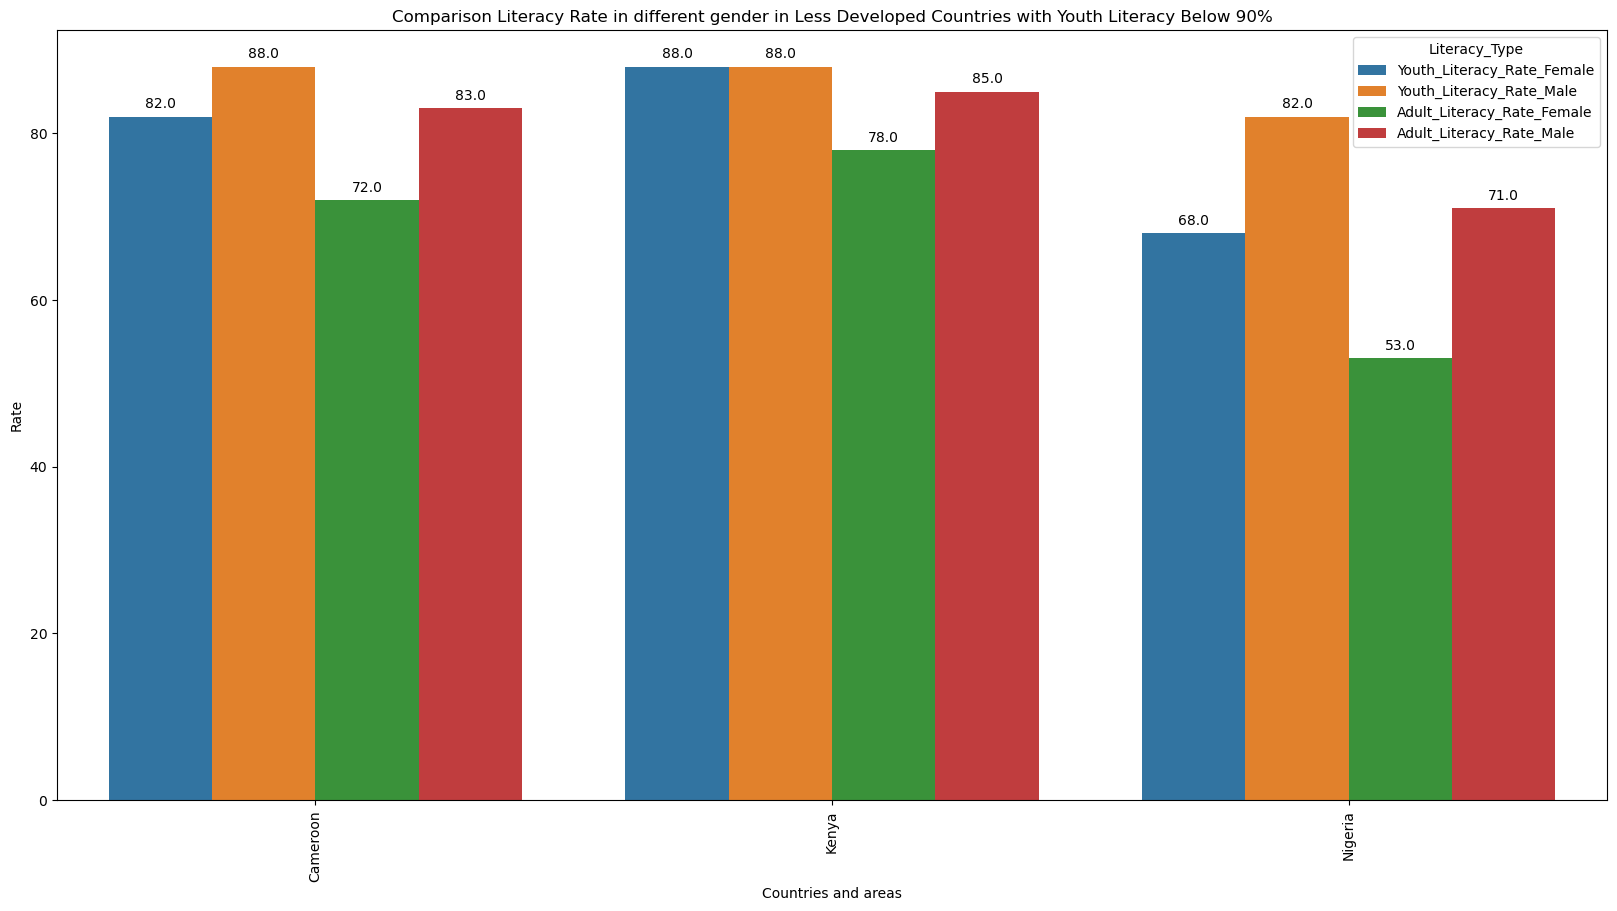

In [73]:
 
   # Melting the dataframe to long format for seaborn
melted_df = less_Less90.melt(id_vars=['ISO3', 'Countries and areas'],
                              value_vars=['Youth_Literacy_Rate_Female','Youth_Literacy_Rate_Male','Adult_Literacy_Rate_Female','Adult_Literacy_Rate_Male'],
                              var_name='Literacy_Type', value_name='Rate')

# Creating the bar plot
plt.figure(figsize=(20, 10))  # Adjust the size as needed
barplot = sns.barplot(data=melted_df, x='Countries and areas', y='Rate', hue='Literacy_Type')

# Iterate over the bars and use the `text` function to display the percentages
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.xticks(rotation=90)  # Rotate the x labels to make them readable
plt.title('Comparison Literacy Rate in different gender in Less Developed Countries with Youth Literacy Below 90%')
plt.savefig('Comparison Literacy Rate in different gender in less Developed Countries with Youth Literacy Below 90%.png')

plt.show()

There is a noticeable difference in literacy rates between genders, especially in adult literacy. For instance, in Nigeria, adult female literacy is significantly lower than adult male literacy, which indicates gender inequality in educational attainment.

In each country shown, youth literacy rates are higher than adult literacy rates for both genders, suggesting that educational initiatives may be more effective with the younger generation or that older adults did not have the same opportunities for education.

 While all countries shown have youth literacy rates below 90%, the degree of disparity between youth and adult literacy, as well as between genders, varies by country. This suggests that factors contributing to low literacy rates may differ by country and require tailored approaches.

The data underscores the necessity of gender-focused educational policies and adult literacy programs. It suggests that improving literacy in developing countries is not just about providing education but also about ensuring that it is accessible to all genders and age groups.

Lower literacy rates among women, particularly in adults, may impact economic growth and social development, as it limits the full participation of half the population in the workforce and civic life.

**Conclusion:**
The gender-specific literacy data informs the research question by highlighting the importance of addressing gender inequality in educational initiatives. To improve overall literacy rates in developing countries, there must be a concerted effort to address the underlying issues of gender disparity and to provide equal educational opportunities to all members of society.

In [105]:
Merged_DF[[ 'Youth_Literacy_Rate_Total','Adult_Literacy_Rate_Total']].describe() 


Youth_Literacy_Rate_Total  Adult_Literacy_Rate_Total
count                 123.000000                 123.000000
mean                   90.837398                  82.845528
std                    12.981465                  17.395723
min                    38.000000                  35.000000
25%                    79.500000                  64.500000
50%                    99.000000                  95.000000
75%                    99.000000                  95.000000
max                   100.000000                 100.000000

In [106]:
Merged_DF90=Merged_DF[Merged_DF['Adult_Literacy_Rate_Total']<90]
Merged_DF90.to_csv("less 90.csv")

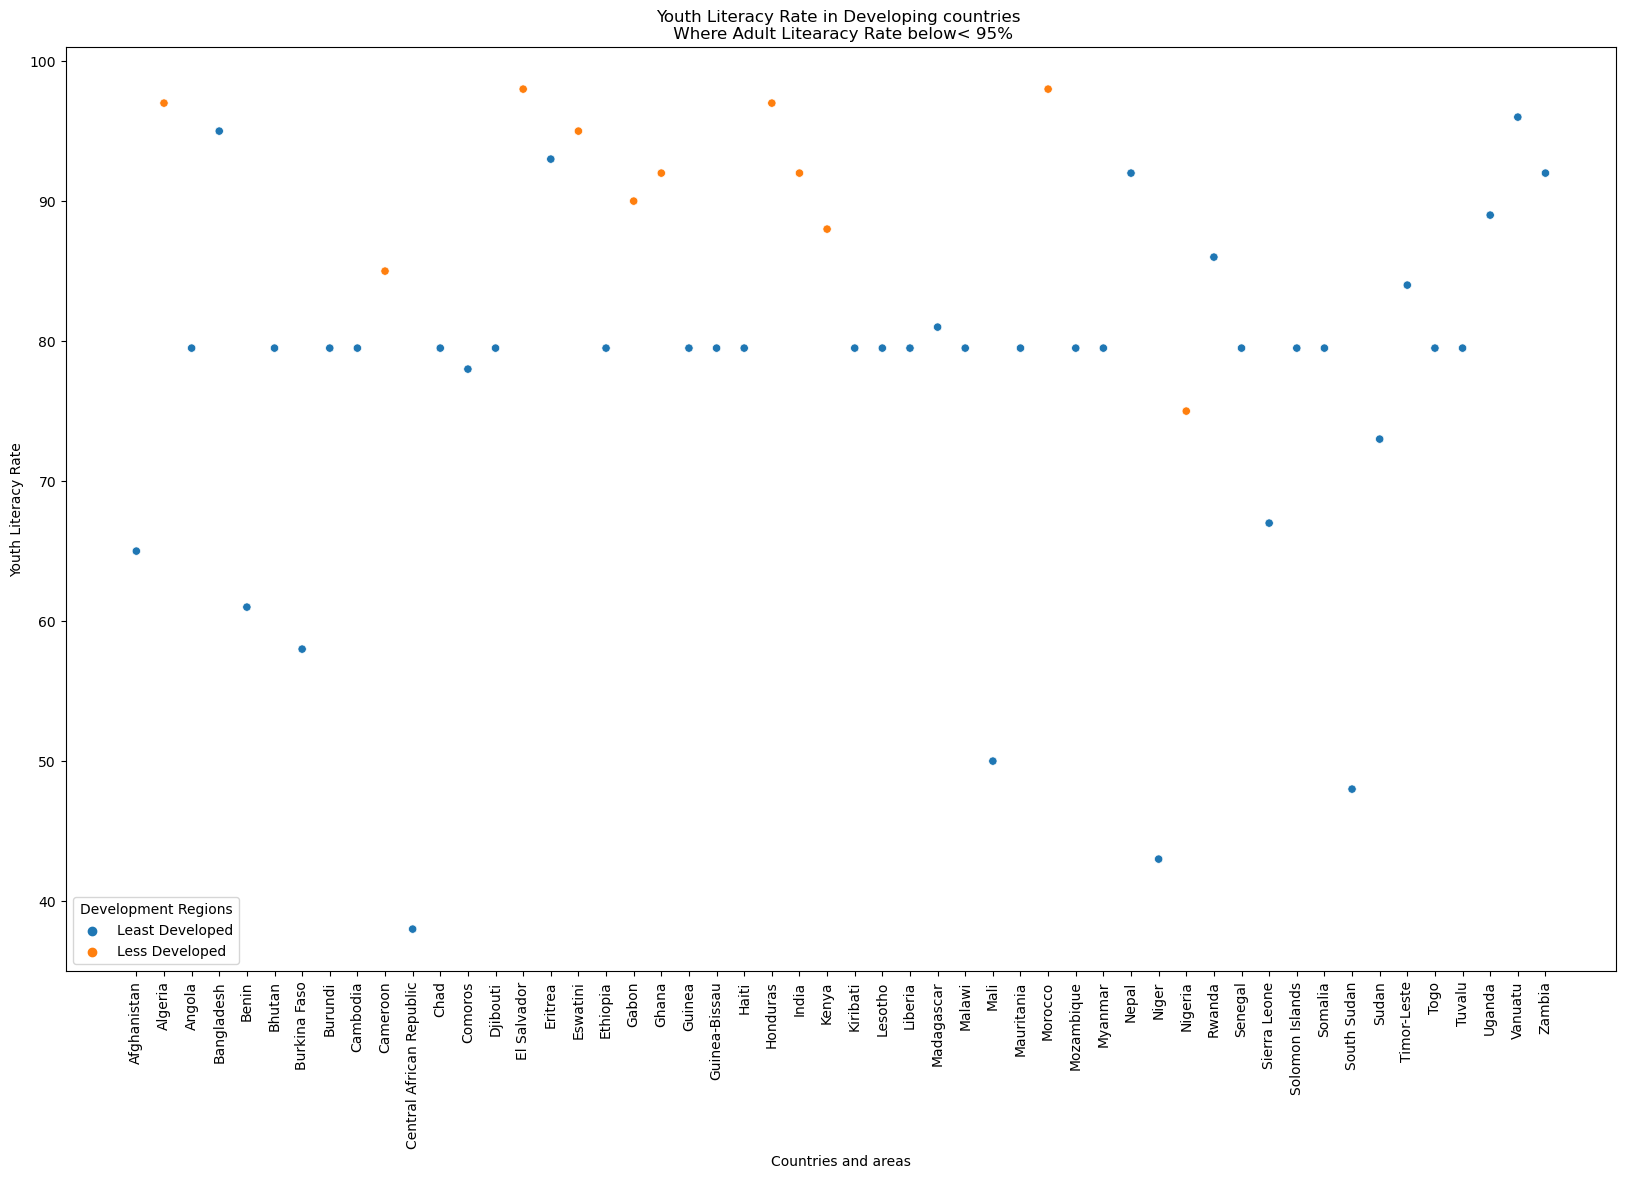

In [107]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=Merged_DF90, x='Countries and areas', y='Youth_Literacy_Rate_Total', hue='Development Regions');
plt.title('Youth Literacy Rate in Developing countries \n Where Adult Litearacy Rate below< 95%')
plt.ylabel('Youth Literacy Rate')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.savefig('Youth Literacy Rate in Developing countries Where Adult Litearacy Rate below 95%.png')
plt.show()

# Findings:
The Youth Literacy Rates are spread out across different values, with many countries showing high rates close to 100%. However, there are also countries with much lower rates, which suggests a disparity in education quality or access.
The 'Least Developed' countries, as marked by the orange dots, tend to have lower Youth Literacy Rates compared to the 'Less Developed' countries, as marked by the blue dots. This could reflect the impact of various socioeconomic factors on educational achievements.
There seems to be some clustering of countries with similar literacy rates. This could be due to geographical proximity and shared regional characteristics affecting education systems.
The countries with the lowest literacy rates could be targeted for educational improvements. Identifying the specific needs and challenges of these countries could be crucial for planning effective interventions.

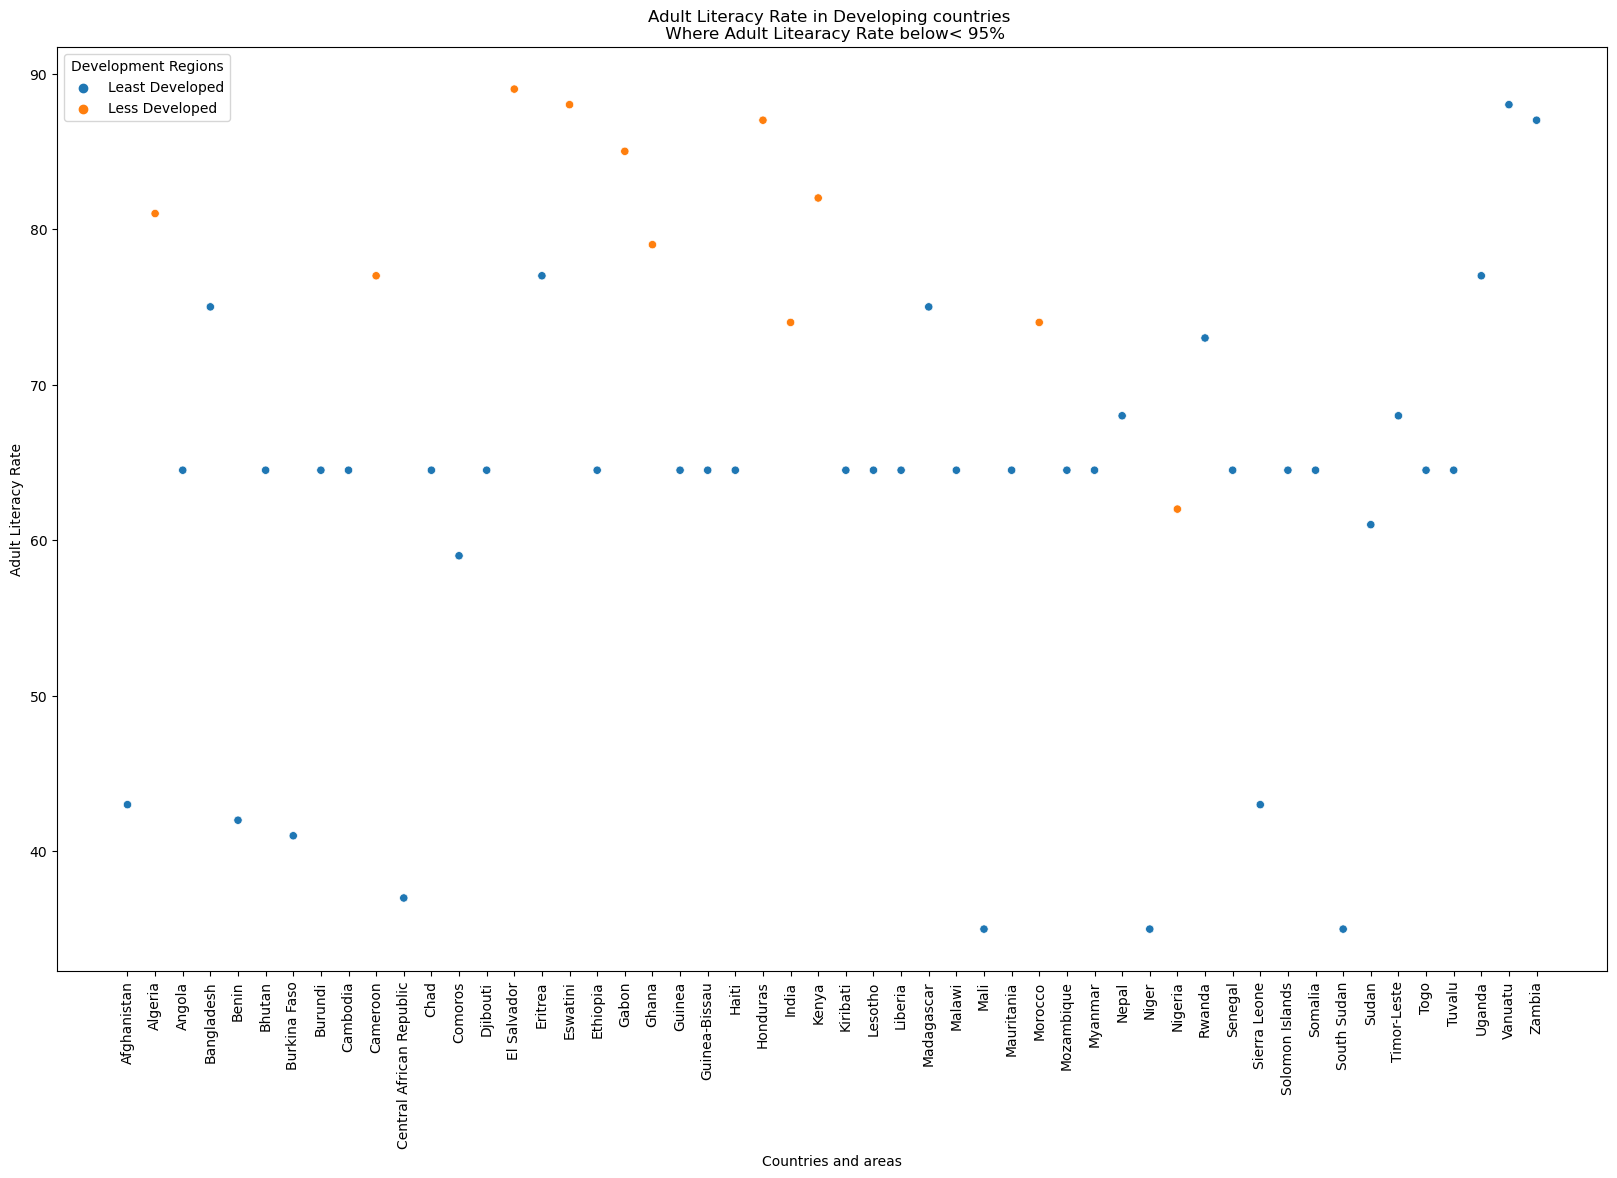

In [110]:
plt.figure(figsize=(20,12))
sns.scatterplot(data=Merged_DF90, x='Countries and areas', y='Adult_Literacy_Rate_Total', hue='Development Regions');
plt.title('Adult Literacy Rate in Developing countries \n Where Adult Litearacy Rate below< 95%')
plt.ylabel('Adult Literacy Rate')
plt.xticks(rotation=90)  # rotate x-axis labels by 90 degrees
plt.savefig('Adult Literacy Rate in Developing countries Where Adult Litearacy Rate below less 95.png')
plt.show()

# Findings:
There's a considerable variation in adult literacy rates among the countries listed. Some countries have rates approaching 90%, while others are significantly lower, indicating a disparity in adult education levels across these nations.

The colors indicate the development regions of each country, revealing that adult literacy rates are not uniform across different regions. This suggests that region-specific factors may significantly impact literacy.

A number of countries, particularly those classified as 'Least Developed', show lower literacy rates, highlighting areas where educational development initiatives might be most needed.

There are several 'Less Developed' countries with relatively high literacy rates, close to the 90% threshold. This may reflect successful educational policies or other socio-economic factors that support adult education.

Governoment in education and development could use this data to make informed decisions about where to allocate resources for adult education programs to improve literacy rates effectively.

## Comparisons:
By comparing this plot to the previous one on Youth Literacy Rates, we may observe how adult literacy rates correlate with youth literacy rates within the same regions. It would be common to see similar trends, as adult literacy can be an indicator of the educational environment that also affects the youth.

Regional Differences: As before, there are clear differences in literacy rates between regions, with 'Least Developed' countries typically showing lower rates of adult literacy. This suggests a need for focused educational policies in these regions.

The plot may indicate other factors influencing literacy rates, such as political stability, economic conditions, and investment in education. Understanding these factors could help in designing interventions to improve literacy.

# Geopolitics Analysis


In [111]:
# visualize Youth Literacy Total in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Youth_Literacy_Rate_Total', range_color=[0, 100],
                    title='Youth Literacy Rate Total in Developing Countries')
fig.show()

In [112]:
# visualize Youth Literacy Female in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Youth_Literacy_Rate_Female', range_color=[0, 100],
                    title='Youth Literacy Rate (Female) in Developing Countries')
fig.show()

In [113]:
# visualize Youth Literacy Male in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Youth_Literacy_Rate_Male', range_color=[0, 100],
                    title='Youth Literacy Rate (Male) in Developing Countries')
fig.show()

In [114]:
# visualize Adult Literacy Total in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Adult_Literacy_Rate_Total', range_color=[0, 100],
                    title='Adult Literacy Rate Total in Developing Countries')
fig.show()

In [115]:
# visualize Adult Literacy Female in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Adult_Literacy_Rate_Female', range_color=[0, 100],
                    title='Adult Literacy Rate (Female) in Developing Countries')
fig.show()

In [116]:
# visualize Adult Literacy Male in developing countries
fig = px.choropleth(Merged_DF, locations='Countries and areas', locationmode='country names',
                    color='Adult_Literacy_Rate_Male', range_color=[0, 100],
                    title='Adult Literacy Rate (Male) in Developing Countries')
fig.show()

## Findings

Our data indicate that most developing countries have high youth and adult literacy rates. However, some countries in Africa, Mali, Niger, South Sudan, etc. have lower literacy rate in total. In addition, the youth and adult literacy rate in both genders 
are significantly low in these countries rather than other developing countries around the world. The youth literacy rate in both genders are not very distinct in most developing countries. However, we can observe that the male youth literacy rates in Afghanistan, Mali, Niger and South Sudan are  signigicantly higher than the female youth literacy rates. Similarly, the adult litearcy rates for both genders significantly distinct. For example, in Afghanistan, the adult literacy rate for male is 55% which means 55 Afghan adult males out of 100 are well litearate. On the other hand, only 30 Afghan adult females out of 100 have a chance to be litearated. In conclusion, we can observe many females are loosing their right to access education in most developing countries.

## Calculate the Mean Out-of-School Rates for Rural and Urban Areas

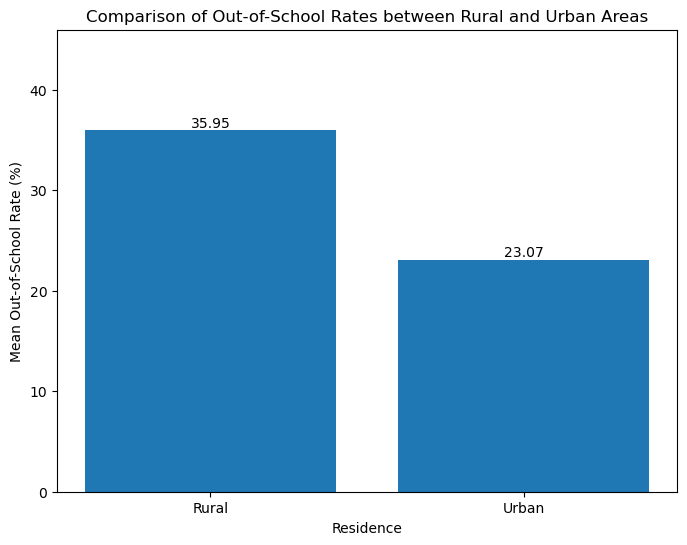

In [121]:
rural_oor_mean = Merged_DF['OOR_UpperSecondary_Residence_Rural'].mean()
urban_oor_mean = Merged_DF['OOR_UpperSecondary_Residence_Urban'].mean()

# Visualize the Data for Out-of-School Rates
plt.figure(figsize=(8,6))
bars = plt.bar(['Rural', 'Urban'], [rural_oor_mean, urban_oor_mean])

# Adding the numbers above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Residence')
plt.ylabel('Mean Out-of-School Rate (%)')
plt.title('Comparison of Out-of-School Rates between Rural and Urban Areas')
plt.ylim(0, max(rural_oor_mean, urban_oor_mean) + 10) # Add some space to fit the annotations

plt.show()

## Findings:
The graph provides clear evidence of the disparity in out-of-school rates between rural and urban areas. It distinctly demonstrates that individuals living in rural regions experience notably high rates of being out of school in comparison to urban areas.

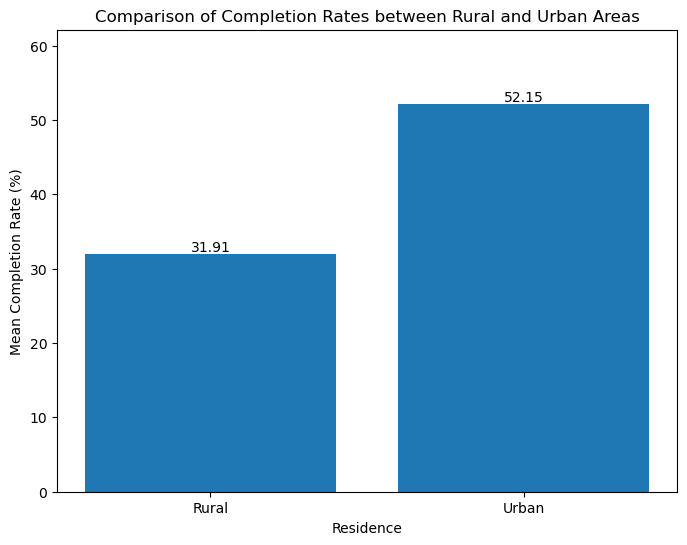

In [124]:
# Calculate the Mean Out-of-School Rates for Rural and Urban Areas
rural_cr_mean = Merged_DF['CR_UpperSecondary_Residence_Rural'].mean()
urban_cr_mean = Merged_DF['CR_UpperSecondary_Residence_Urban'].mean()
# Visualize the Data for Completion Rates
plt.figure(figsize=(8,6))
completion_bars = plt.bar(['Rural', 'Urban'], [rural_cr_mean, urban_cr_mean])

# Adding the numbers above each bar for Completion Rates
for bar in completion_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Residence')
plt.ylabel('Mean Completion Rate (%)')
plt.title('Comparison of Completion Rates between Rural and Urban Areas')
plt.ylim(0, max(rural_cr_mean, urban_cr_mean) + 10) # Add some space to fit the annotations

plt.show()


## Findings:

The graph provides clear evidence of out-of-school rates between rural and urban areas. It distinctly demonstrates that individuals living in rural regions experience notably low rates of Completion Rates in comparison to urban areas.

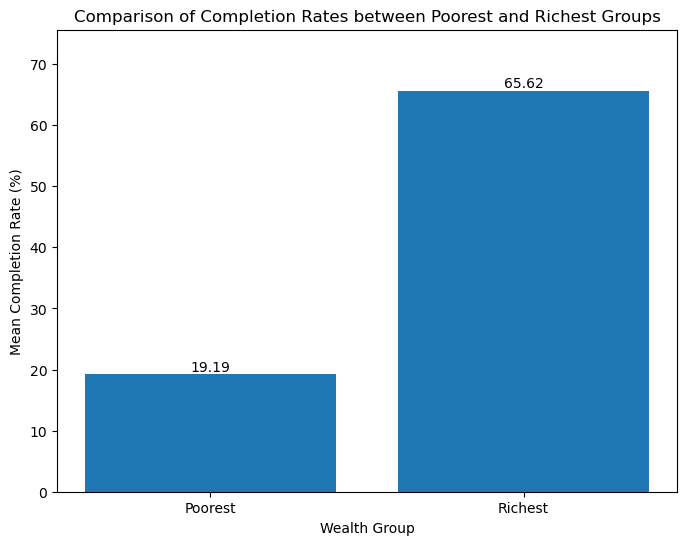

In [126]:
# Calculate the Mean Completion Rates for the Poorest and Richest Groups
poorest_cr_mean = Merged_DF['CR_UpperSecondary_Wealth_Poorest'].mean()
richest_cr_mean = Merged_DF['CR_UpperSecondary_Wealth_Richest'].mean()

# Visualize the Data for Completion Rates
plt.figure(figsize=(8,6))
wealth_bars = plt.bar(['Poorest', 'Richest'], [poorest_cr_mean, richest_cr_mean])

# Adding the numbers above each bar for Completion Rates
for bar in wealth_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Wealth Group')
plt.ylabel('Mean Completion Rate (%)')
plt.title('Comparison of Completion Rates between Poorest and Richest Groups')
plt.ylim(0, max(poorest_cr_mean, richest_cr_mean) + 10) # Add some space to fit the annotations

plt.show()

## Finding
The graph illustrates a clear disparity in completion rates between socio-economic groups, with the lowest rates observed among individuals from economically disadvantaged backgrounds and the highest rates observed among those from the richest groups.

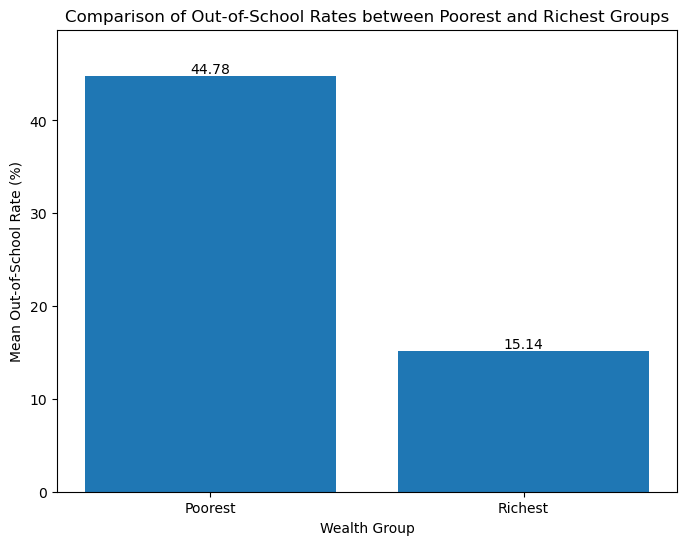

In [127]:
# Calculate the Mean Completion Rates for the Poorest and Richest Groups
poorest_oor_mean = Merged_DF['OOR_UpperSecondary_Wealth_Poorest'].mean()
richest_oor_mean = Merged_DF['OOR_UpperSecondary_Wealth_Richest'].mean()

# Visualize the Data for Out-of-School Rates
plt.figure(figsize=(8,6))
oor_bars = plt.bar(['Poorest', 'Richest'], [poorest_oor_mean, richest_oor_mean])

# Adding the numbers above each bar for Out-of-School Rates
for bar in oor_bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel('Wealth Group')
plt.ylabel('Mean Out-of-School Rate (%)')
plt.title('Comparison of Out-of-School Rates between Poorest and Richest Groups')
plt.ylim(0, max(poorest_oor_mean, richest_oor_mean) + 5) # Add some space to fit the annotations

plt.show()

# Findings:
The graph vividly depicts a significant disparity in Out_Of_School rates across different socio-economic groups. Specifically, it reveals that individuals from economically disadvantaged backgrounds exhibit the highest rates of being out of school, whereas those belonging to the richest groups demonstrate the lowest rates.

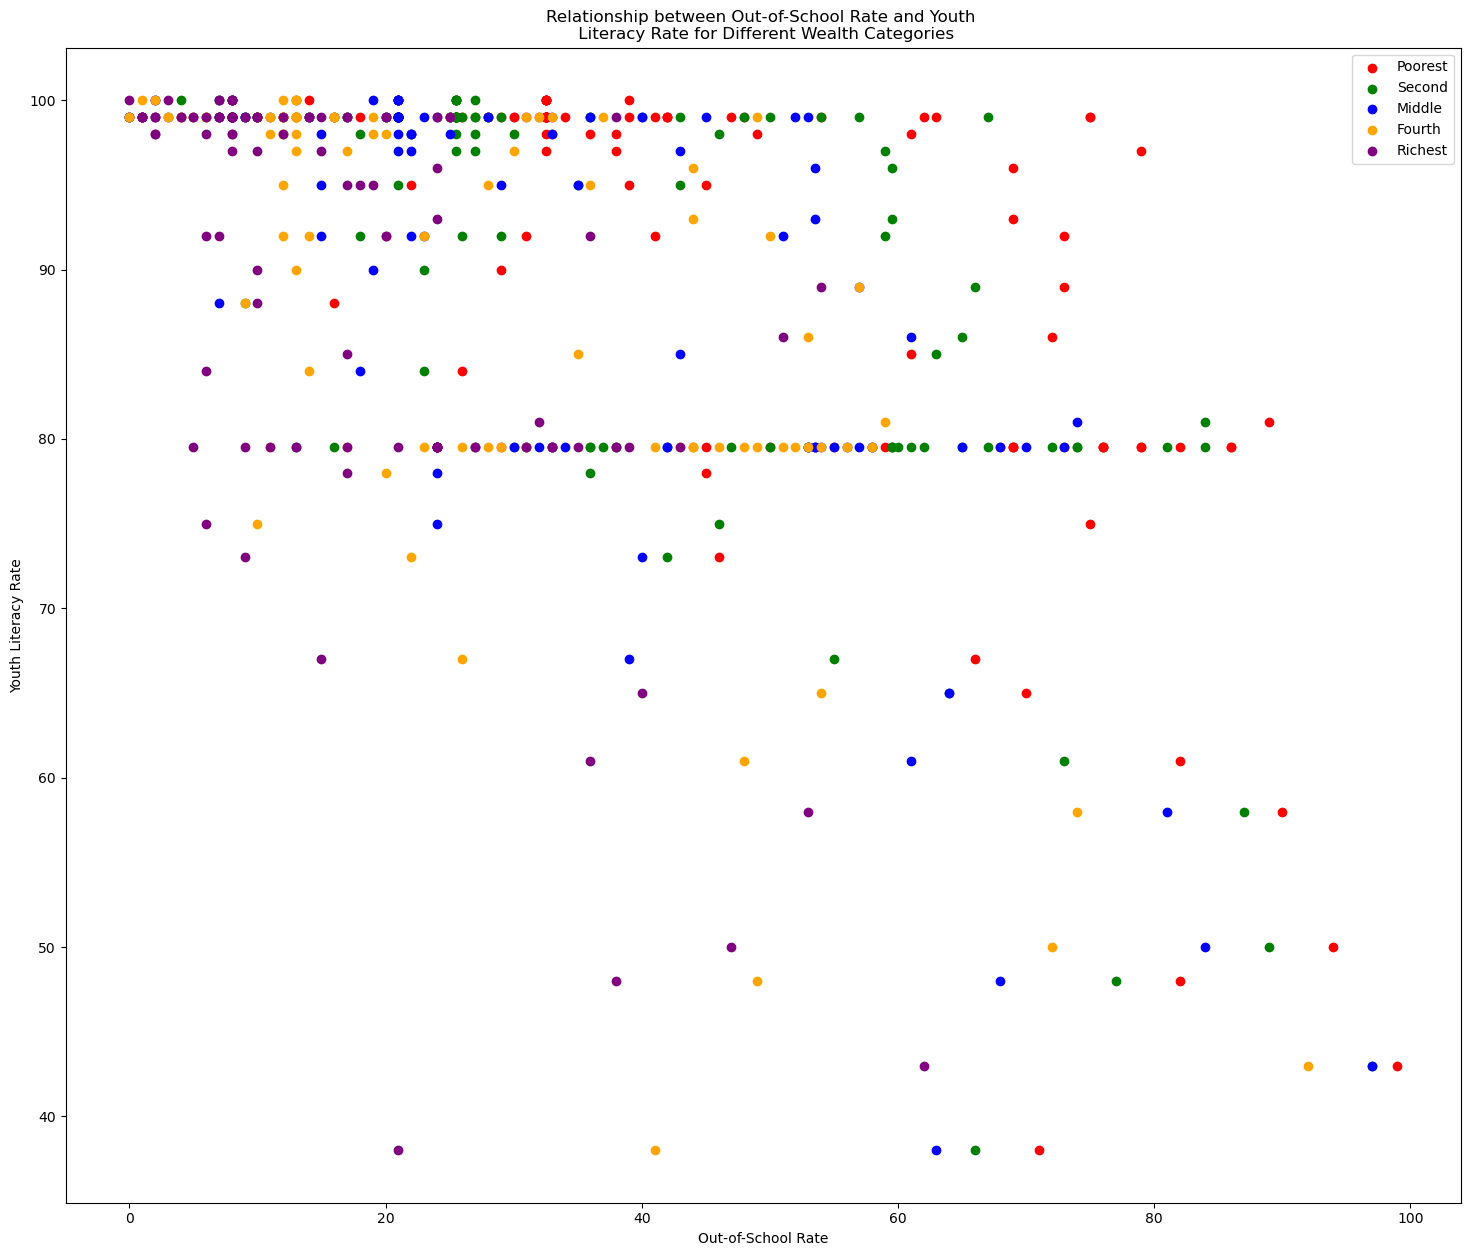

In [149]:

# Extract the relevant columns for the scatter plot
wealth_categories = ['Poorest', 'Second', 'Middle', 'Fourth']
oor_poorest = Merged_DF['OOR_UpperSecondary_Wealth_Poorest']
oor_second = Merged_DF['OOR_UpperSecondary_Wealth_Second']
oor_middle = Merged_DF['OOR_UpperSecondary_Wealth_Middle']
oor_fourth = Merged_DF['OOR_UpperSecondary_Wealth_Fourth']
oor_richest = Merged_DF['OOR_UpperSecondary_Wealth_Richest']

literacy_rate = Merged_DF['Youth_Literacy_Rate_Total']

# Create a scatter plot to show the relationship between CR and literacy rates for different wealth categories
plt.figure(figsize=(18,15))
plt.scatter(oor_poorest, literacy_rate, color='red', label='Poorest')
plt.scatter(oor_second, literacy_rate, color='green', label='Second')
plt.scatter(oor_middle, literacy_rate, color='blue', label='Middle')
plt.scatter(oor_fourth, literacy_rate, color='orange', label='Fourth')
plt.scatter(oor_richest, literacy_rate, color='purple', label='Richest')

plt.xlabel('Out-of-School Rate')
plt.ylabel('Youth Literacy Rate')
plt.title('Relationship between Out-of-School Rate and Youth \n Literacy Rate for Different Wealth Categories')
plt.legend()
plt.savefig('oor and YLR WEALTH.png')
plt.show()

### Relationship between Out-of-School Rate and Youth Literacy Rate
- General Trend: There appears to be a trend where higher out-of-school rates are associated with lower youth literacy rates. This is especially visible among the poorest and second wealth categories (red and green points), where higher OOR often aligns with lower YLR.
- Wealth Disparities: The poorest wealth category (red points) has the widest spread in the YLR, suggesting that there is significant variability in how the poorest wealth category impacts youth literacy across different developing countries.
- Richest Category: The richest wealth category (purple points) is tightly clustered at the high end of the YLR, indicating that in wealthier segments, the youth literacy rates are consistently high and less affected by OOR.

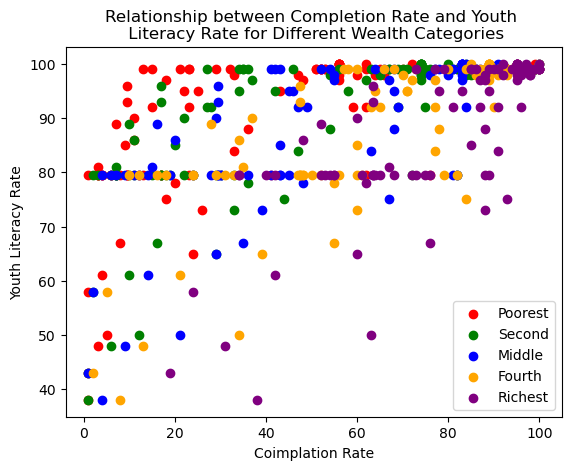

In [150]:

# Extract the relevant columns for the scatter plot
wealth_categories = ['Poorest', 'Second', 'Middle', 'Fourth']
cr_poorest = Merged_DF['CR_LowerSecondary_Wealth_Poorest']
cr_second = Merged_DF['CR_LowerSecondary_Wealth_Second']
cr_middle = Merged_DF['CR_LowerSecondary_Wealth_Middle']
cr_fourth = Merged_DF['CR_LowerSecondary_Wealth_Fourth']
cr_richest = Merged_DF['CR_LowerSecondary_Wealth_Richest']

literacy_rate = Merged_DF['Youth_Literacy_Rate_Total']

# Create a scatter plot to show the relationship between OOR and literacy rates for different wealth categories
plt.scatter(cr_poorest, literacy_rate, color='red', label='Poorest')
plt.scatter(cr_second, literacy_rate, color='green', label='Second')
plt.scatter(cr_middle, literacy_rate, color='blue', label='Middle')
plt.scatter(cr_fourth, literacy_rate, color='orange', label='Fourth')
plt.scatter(cr_richest, literacy_rate, color='purple', label='Richest')

plt.xlabel('Coimplation Rate')
plt.ylabel('Youth Literacy Rate')
plt.title('Relationship between Completion Rate and Youth \n Literacy Rate for Different Wealth Categories')
plt.legend()
plt.savefig('OOR + YLR.png')
plt.show()

### Relationship between Completion Rate and Youth Literacy Rate
- General Trend: There is a positive relationship between completion rates and youth literacy rates, with higher CR often associated with higher YLR. This trend is particularly strong in the richest wealth category (purple points).
- Consistency in High CR and YLR: The data points for the richest (purple) and fourth (orange) wealth categories are clustered at higher completion rates and literacy rates, indicating that wealthier segments of the population tend to have both higher CR and YLR.
- Variability Among the Poorest: Similar to the first graph, the poorest (red) and second (green) wealth categories show more variability in YLR, even with varying completion rates. This suggests that other factors besides wealth may influence literacy rates.

In [151]:
fig = px.scatter_3d(Merged_DF, x='CR_UpperSecondary_Total', y='Youth_Literacy_Rate_Total', z='OOR_UpperSecondary_Total',
                   color='Countries and areas', title='CompletionRate vs. Literacy')
fig.write_html('COMP RATE AND LITRACY.html')
fig.show()

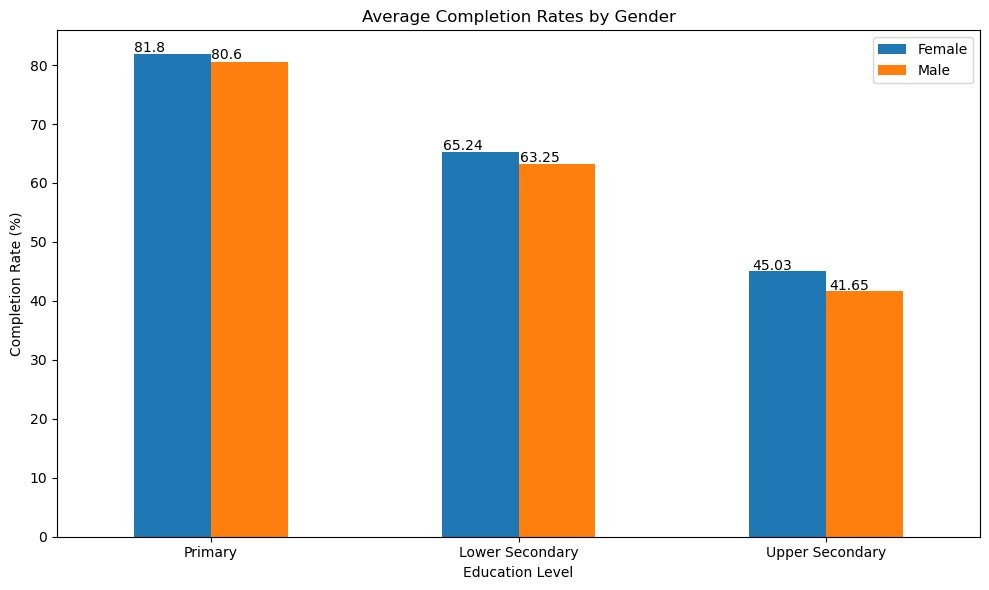

In [155]:
# Calculate average completion rates for females and males
cr_primary_female_avg = Merged_DF['CR_Primary_Female'].mean()
cr_primary_male_avg = Merged_DF['CR_Primary_Male'].mean()

cr_lowersecondary_female_avg = Merged_DF['CR_LowerSecondary_Female'].mean()
cr_lowersecondary_male_avg = Merged_DF['CR_LowerSecondary_Male'].mean()

cr_uppersecondary_female_avg = Merged_DF['CR_UpperSecondary_Female'].mean()
cr_uppersecondary_male_avg = Merged_DF['CR_UpperSecondary_Male'].mean()

# Create a DataFrame for completion rates
completion_rate_data = pd.DataFrame({
    'Education Level': ['Primary', 'Lower Secondary', 'Upper Secondary'],
    'Female': [cr_primary_female_avg, cr_lowersecondary_female_avg, cr_uppersecondary_female_avg],
    'Male': [cr_primary_male_avg, cr_lowersecondary_male_avg, cr_uppersecondary_male_avg]
})

# Plotting the bar graph with numbers above each bar
ax = completion_rate_data.plot(x='Education Level', y=['Female', 'Male'], kind='bar', figsize=(10, 6))
plt.title('Average Completion Rates by Gender')
plt.xlabel('Education Level')
plt.ylabel('Completion Rate (%)')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

# Adding the numbers above each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout() # Adjust layout to make room for annotations

plt.show()

### Findings:

As the education level progresses from primary to upper secondary, the completion rates decrease for both genders.
Females consistently have higher Average completion rates than males, especially at the upper secondary level, suggesting gender-specific factors that support or hinder educational progression.

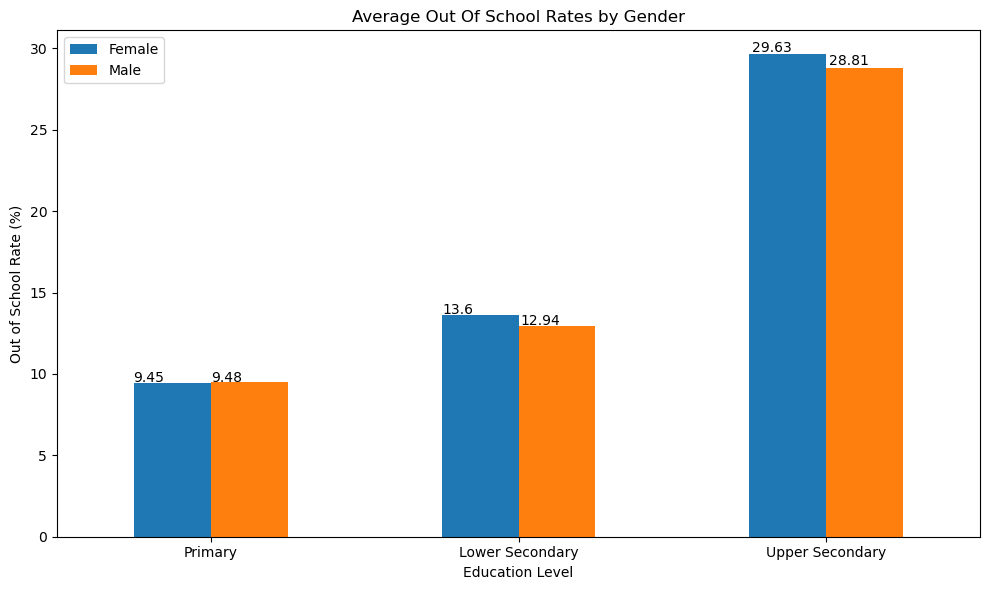

In [157]:
# Calculate average completion rates for females and males

OOR_primary_female_avg = Merged_DF['OOR_Primary_Female'].mean()
OOR_primary_male_avg = Merged_DF['OOR_Primary_Male'].mean()

OOR_lowersecondary_female_avg = Merged_DF['OOR_LowerSecondary_Female'].mean()
OOR_lowersecondary_male_avg = Merged_DF['OOR_LowerSecondary_Male'].mean()

OOR_uppersecondary_female_avg = Merged_DF['OOR_UpperSecondary_Female'].mean()
OOR_uppersecondary_male_avg = Merged_DF['OOR_UpperSecondary_Male'].mean()

# Create a DataFrame for out-of-school rates
oor_data = pd.DataFrame({
    'Education Level': ['Primary', 'Lower Secondary', 'Upper Secondary'],
    'Female': [OOR_primary_female_avg, OOR_lowersecondary_female_avg, OOR_uppersecondary_female_avg],
    'Male': [OOR_primary_male_avg, OOR_lowersecondary_male_avg, OOR_uppersecondary_male_avg]
})

# Plotting the bar graph with numbers above each bar
ax = oor_data.plot(x='Education Level', y=['Female', 'Male'], kind='bar', figsize=(10, 6))
plt.title('Average Out Of School Rates by Gender')
plt.xlabel('Education Level')
plt.ylabel('Out of School Rate (%)')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

# Adding the numbers above each bar for Out of School Rates
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout() # Adjust layout to make room for annotations
plt.show()

### Findings:

Out-of-school rates for females are consistently higher across all education levels, with the most significant disparities at the upper secondary level.
The increasing trend of out-of-school rates from primary to upper secondary suggests growing challenges in retaining students as they progress through higher education levels.

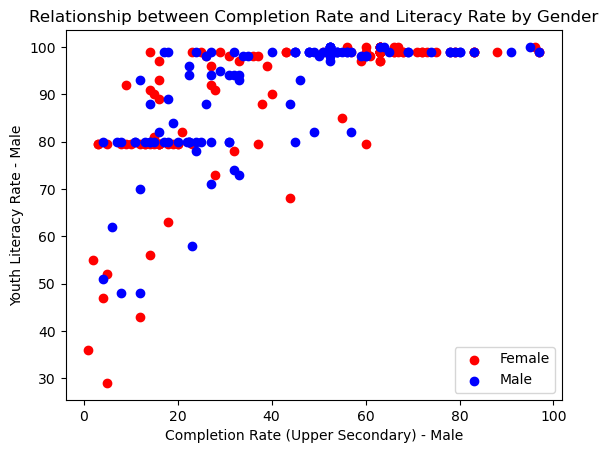

In [158]:

# Extract relevant columns
completion_rate_female = Merged_DF['CR_UpperSecondary_Female']
completion_rate_male = Merged_DF['CR_UpperSecondary_Male']
oos_rate_female = Merged_DF['OOR_UpperSecondary_Female']
oos_rate_male = Merged_DF['OOR_UpperSecondary_Male']
literacy_rate_female = Merged_DF['Youth_Literacy_Rate_Female']
literacy_rate_male = Merged_DF['Youth_Literacy_Rate_Male']

# Create scatter plot for females
plt.scatter(completion_rate_female, literacy_rate_female, color='red', label='Female')
plt.xlabel('Completion Rate (Upper Secondary) - Female')
plt.ylabel('Youth Literacy Rate - Female')

# Create scatter plot for males
plt.scatter(completion_rate_male, literacy_rate_male, color='blue', label='Male')
plt.xlabel('Completion Rate (Upper Secondary) - Male')
plt.ylabel('Youth Literacy Rate - Male')

# Add legend and title
plt.legend()
plt.title('Relationship between Completion Rate and Literacy Rate by Gender')
plt.savefig('Relationship between comp rate and litracy rate by gender.png')
# Display the plot
plt.show()

### Findings:

There is a positive correlation between completion rates and literacy rates for both genders, implying that higher completion rates are associated with higher literacy rates.
Females tend to achieve higher literacy rates across a range of completion rates compared to males, indicating potential gender-based advantages in literacy acquisition or retention.

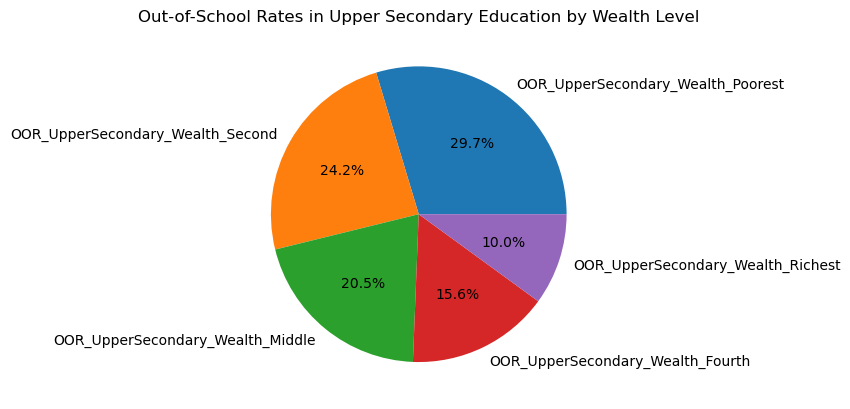

In [159]:

# Extract relevant columns
wealth_levels = ['OOR_UpperSecondary_Wealth_Poorest', 'OOR_UpperSecondary_Wealth_Second',
                'OOR_UpperSecondary_Wealth_Middle', 'OOR_UpperSecondary_Wealth_Fourth',
                'OOR_UpperSecondary_Wealth_Richest']

# Calculate the average out-of-school rates for each wealth level
average_oor_rates = Merged_DF[wealth_levels].mean()

# Create a pie chart
plt.pie(average_oor_rates, labels=wealth_levels, autopct='%1.1f%%')
plt.title('Out-of-School Rates in Upper Secondary Education by Wealth Level')

# Display the chart
plt.show()

## Finding:
The analysis indicates that countries or areas with a poor economy have higher out-of-school rates (OOR) in upper secondary level, while those with a rich economy tend to have lower OOR. This finding underscores the correlation between economic status and educational access. Efforts should be made to address this disparity and provide equal opportunities for students across different wealth levels to reduce educational inequalities.

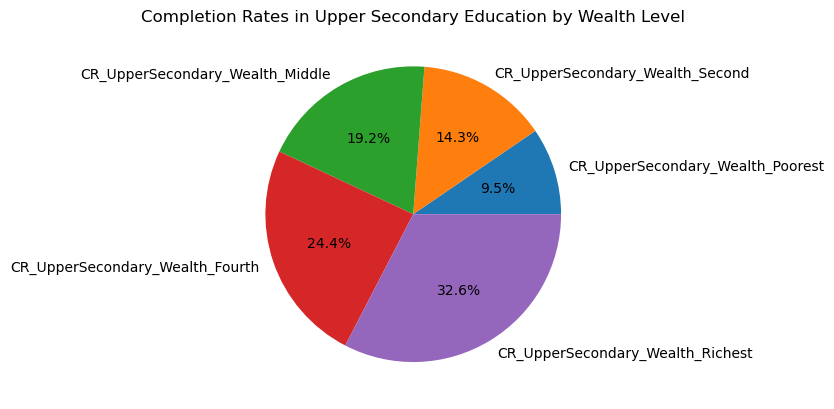

In [160]:
# Extract relevant columns
wealth_levels = ['CR_UpperSecondary_Wealth_Poorest', 'CR_UpperSecondary_Wealth_Second',
                'CR_UpperSecondary_Wealth_Middle', 'CR_UpperSecondary_Wealth_Fourth',
                'CR_UpperSecondary_Wealth_Richest']

# Calculate the average completion rates for each wealth level
average_completion_rates = Merged_DF[wealth_levels].mean()

# Create a pie chart
plt.pie(average_completion_rates, labels=wealth_levels, autopct='%1.1f%%')
plt.title('Completion Rates in Upper Secondary Education by Wealth Level')

# Display the chart
plt.show()

## Findings:
The analysis represents that completion rates in upper secondary education are higher in countries or areas with a rich economy, while they tend to be lower in those with a poor economy. This finding underscores the correlation between economic status and educational achievement. Efforts should be made to address this disparity and provide equal opportunities for students across different wealth levels to reduce educational inequalities.

# Prediction model:

In [181]:

# Extract relevant columns for the linear regression model
X = Merged_DF[['OOR_UpperSecondary_Total', 'CR_UpperSecondary_Total',
               'CR_Primary_Total', 'CR_LowerSecondary_Total',
               "OOR_Primary_Total", "OOR_LowerSecondary_Total",
               'OOR_UpperSecondary_Total', 'ATR_Primary_Total', 
               'ATR_LowerSecondary_Total', 'ATR_UpperSecondary_Total']]
y = Merged_DF['Youth_Literacy_Rate_Total']

# Handling missing values if any by dropping them
X = X.dropna()
y = y[X.index]  # Ensure the target variable aligns with the features after dropping missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and coefficient of determination (R^2 Score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("r squared:", r2)

Mean Squared Error: 60.49210962618472
r squared: 0.6842501731569042


In [173]:

# Calculate model's performance metrics for the new model
mse1 = mean_squared_error(y1_test, y_pred1)
r2_1 = r2_score(y1_test, y_pred1)

mse1, r2_1

(52.41637132013926, 0.7264029925497371)

In [182]:
# Extract relevant columns for the linear regression model, ensuring no duplicated columns
X = Merged_DF[['OOR_UpperSecondary_Total', 'CR_UpperSecondary_Total',
               'CR_Primary_Total', 'CR_LowerSecondary_Total',
               "OOR_Primary_Total", "OOR_LowerSecondary_Total"]]
y = Merged_DF['Youth_Literacy_Rate_Total']

# Handling missing values if any by dropping them
X = X.dropna()
y = y[X.index]  # Ensure the target variable aligns with the features after dropping missing values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error (MSE) and coefficient of determination (R^2 Score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(52.4163713201393, 0.7264029925497368)

- **Mean Squared Error (MSE):** The MSE is approximately 52.42, which is a measure of the model's average prediction error.

- **R-squared (R²):** The R² value is approximately 0.73, indicating that about 73% of the variance in the Youth Literacy Rate is explained by the model's inputs.

- **These results suggest an improved fit of the model compared to the previous computation, with a higher R² value and a lower MSE, indicating a better predictive accuracy.**

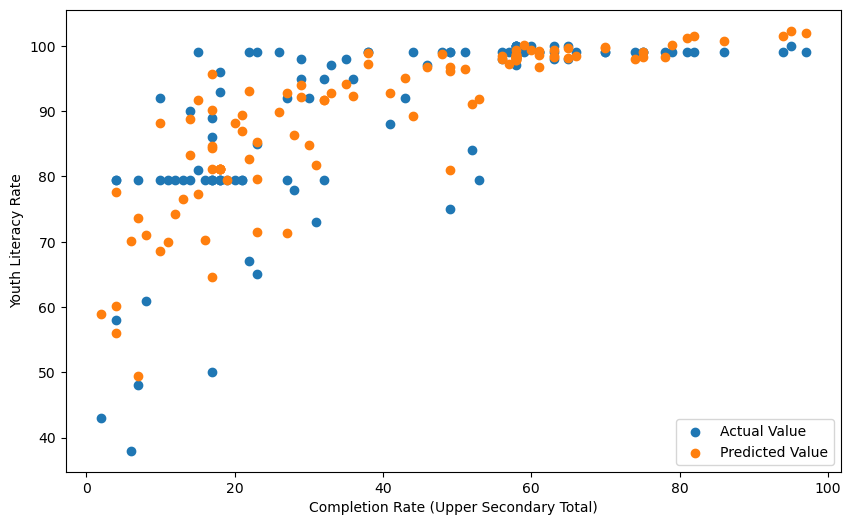

In [185]:
# Extract relevant columns
X1 = Merged_DF[[ 'CR_UpperSecondary_Total','CR_Primary_Total','CR_LowerSecondary_Total',
                "OOR_Primary_Total", "OOR_LowerSecondary_Total",'OOR_UpperSecondary_Total']]  
y1 = Merged_DF['Youth_Literacy_Rate_Total']

# Create a linear regression model
model1 = LinearRegression()

# Train the model
model1.fit(X1, y1)

plt.figure(figsize=(10,6))
plt.scatter(Merged_DF.CR_UpperSecondary_Total, Merged_DF.Youth_Literacy_Rate_Total, label="Actual Value")
plt.scatter(Merged_DF.CR_UpperSecondary_Total, model1.predict(X1), label="Predicted Value")  # Corrected to use 'model1'
plt.legend(labels=["Actual Value", "Predicted Value"])

# Uncomment and correct the labels
plt.xlabel('Completion Rate (Upper Secondary Total)')  # Corrected label
plt.ylabel('Youth Literacy Rate')
plt.savefig('actual_vs_predicted_youth_literacy_rate.png')  # Corrected file name
plt.show()